In [1]:
import numpy as np  
import sys 
import random 
from pathlib import Path
import json
import time 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
ticker.Locator.MAXTICKS = 10000 
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist, pdist, squareform

import copy

import scienceplots
plt.style.use('science')
plt.style.use(['no-latex'])

import helper           
import clustering
import clustering_metric
import color

c_vals = ['#e53e3e', '#3182ce', '#38a169', '#805ad5','#dd6b20', '#319795', '#718096', '#d53f8c', '#d69e2e',] * 10
c_vals_l = ['#feb2b2', '#90cdf4', '#9ae6b4', '#d6bcfa', '#fbd38d', '#81e6d9', '#e2e8f0', '#fbb6ce', '#faf089',] * 10
c_vals_d = ['#9b2c2c', '#2c5282', '#276749', '#553c9a', '#9c4221', '#285e61', '#2d3748', '#97266d', '#975a16',] * 10 
l_vals = ['solid', 'dashed', 'dotted', 'dashdot', '-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]
markers_vals = ['o', 'v', '*', '+', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
linestyles = ["-", "--", "-."]

In [2]:
import psutil

mem = psutil.virtual_memory()
print(f"Total: {mem.total / 1e9:.2f} GB")
print(f"Available: {mem.available / 1e9:.2f} GB")
print(f"Used: {mem.used / 1e9:.2f} GB")
print(f"Percentage: {mem.percent}%")

Total: 540.10 GB
Available: 532.63 GB
Used: 4.28 GB
Percentage: 1.4%


In [3]:
# load and unpack parameters
# make sure to change out_path and out_param_path simultaneously
seed = "467" # 467, 870
task = "everything"
hidden = "300"
batch = "128"
feature = "noL2" # noL2, L2
accfeature = "+angle" # +angle, ""
# this file might be large, for the sake of completeness
out_path_name = "multiple_tasks/" + f"param_{task}_seed{seed}_{feature}+hidden{hidden}+batch{batch}{accfeature}_result.npz"
out_path = Path(out_path_name)

size_bytes = out_path.stat().st_size  
size_gb = size_bytes / 1024**3 
print(f"{out_path} = {size_gb:.3f} GiB")

with np.load(out_path_name, allow_pickle=True) as data:
    rules_epochs = data["rules_epochs"].item()
    hyp_dict = data["hyp_dict"].item()
    all_rules = data["all_rules"]
    test_task = data["test_task"]
    # Ms = data["Ms"]
    Ms_orig = data["Ms_orig"]
    hs = data["hs"]
    bs = data["bs"]
    xs = data["xs"]

print(f"Ms_orig: {Ms_orig.shape}")
print(f"hs: {hs.shape}")
print(f"xs: {xs.shape}")

out_param_path = "multiple_tasks/" + f"param_{task}_seed{seed}_{feature}+hidden{hidden}+batch{batch}{accfeature}_param.json"
out_param_path = Path(out_param_path)

with out_param_path.open() as f: 
    raw_cfg_param = json.load(f)

task_params, train_params, net_params = raw_cfg_param["task_params"], raw_cfg_param["train_params"], raw_cfg_param["net_params"]

multiple_tasks/param_everything_seed467_noL2+hidden300+batch128+angle_result.npz = 3.393 GiB
Ms_orig: (225, 105, 300, 300)
hs: (225, 105, 300)
xs: (225, 105, 300)


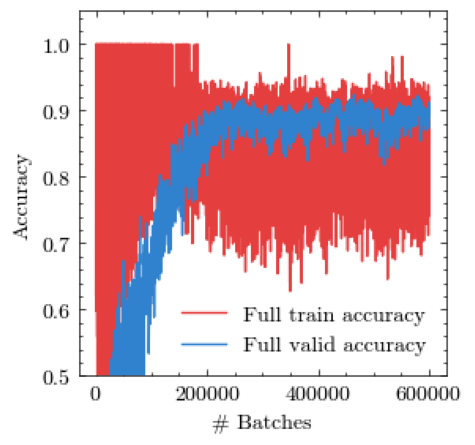

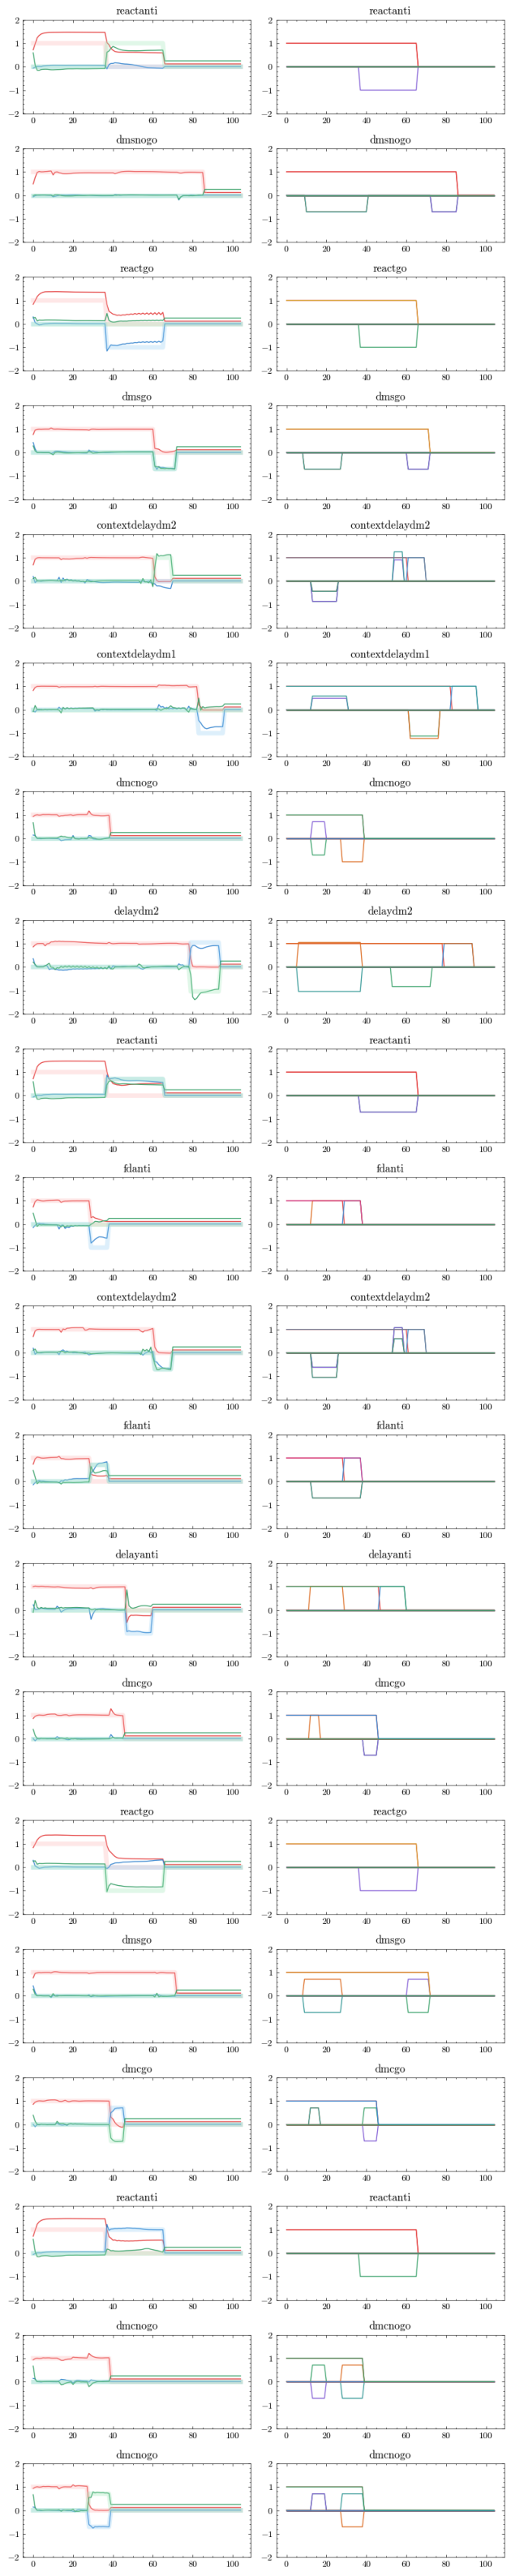

In [4]:
from pathlib import Path
from PIL import Image

def find_pngs_with_components(root, components, recursive=True, case_sensitive=False):
    """
    Return a list of Paths to .png files whose *filenames* contain all substrings in `components`.
    """
    root = Path(root)
    if not case_sensitive:
        components = [c.lower() for c in components]

    candidates = root.rglob("*.png") if recursive else root.glob("*.png")
    matches = []
    for p in candidates:
        name = p.name if case_sensitive else p.name.lower()
        if all(c in name for c in components):
            matches.append(p)

    matches.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    return matches

def show_image(path, size=(6,6)):
    img = Image.open(path)
    fig, ax = plt.subplots(1,1,figsize=size)
    ax.imshow(img)
    ax.axis('off')
    fig.show()

search_root = "./multiple_tasks/"

components_loss = ["loss", f"seed{seed}"]    
matches_loss = find_pngs_with_components(search_root, components_loss,
                                    recursive=True, case_sensitive=False)
show_image(matches_loss[0])

components_showcase = ["lowD", f"seed{seed}"]    
matches_showcase = find_pngs_with_components(search_root, components_showcase,
                                    recursive=True, case_sensitive=False)
show_image(matches_showcase[0], size=(4*2,4*20))

clustering_name: input
cell_vars_rules.shape: (49, 300)
cell_max_var.shape: (300,)
cell_vars_rules_sorted_norm: (49, 300)
metrics_all: {'CH_blocks': [1513.0322905548965, np.float64(25.439443252774662), np.float64(0.5343302477628491)], 'DB_blocks': [151.1524006949378, np.float64(2388.5511149250706), np.float64(510.0289946742997)], 'std/mean': [np.float64(0.8346753551505277), np.float64(1.376519669642485), np.float64(0.0031552119135342762)]}
best_k_row: 5; best_k_col: 5
best_alt_k_row: 5; best_alt_k_col: 5
row_breakers: [20, 25, 32, 43, 49]
clustering_name: hidden
cell_vars_rules.shape: (49, 300)
cell_max_var.shape: (300,)
cell_vars_rules_sorted_norm: (49, 300)
metrics_all: {'CH_blocks': [73.59629956186463, np.float64(2.9418965672203776), np.float64(0.029017185400163015)], 'DB_blocks': [1210.5204722761348, np.float64(15225.955541732972), np.float64(4747.607731066358)], 'std/mean': [np.float64(1.1925187464758742), np.float64(1.7034724008276796), np.float64(0.002025667509792028)]}
best_k_r

SystemExit: 

/home/zihan.zhang/.conda/envs/mpn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


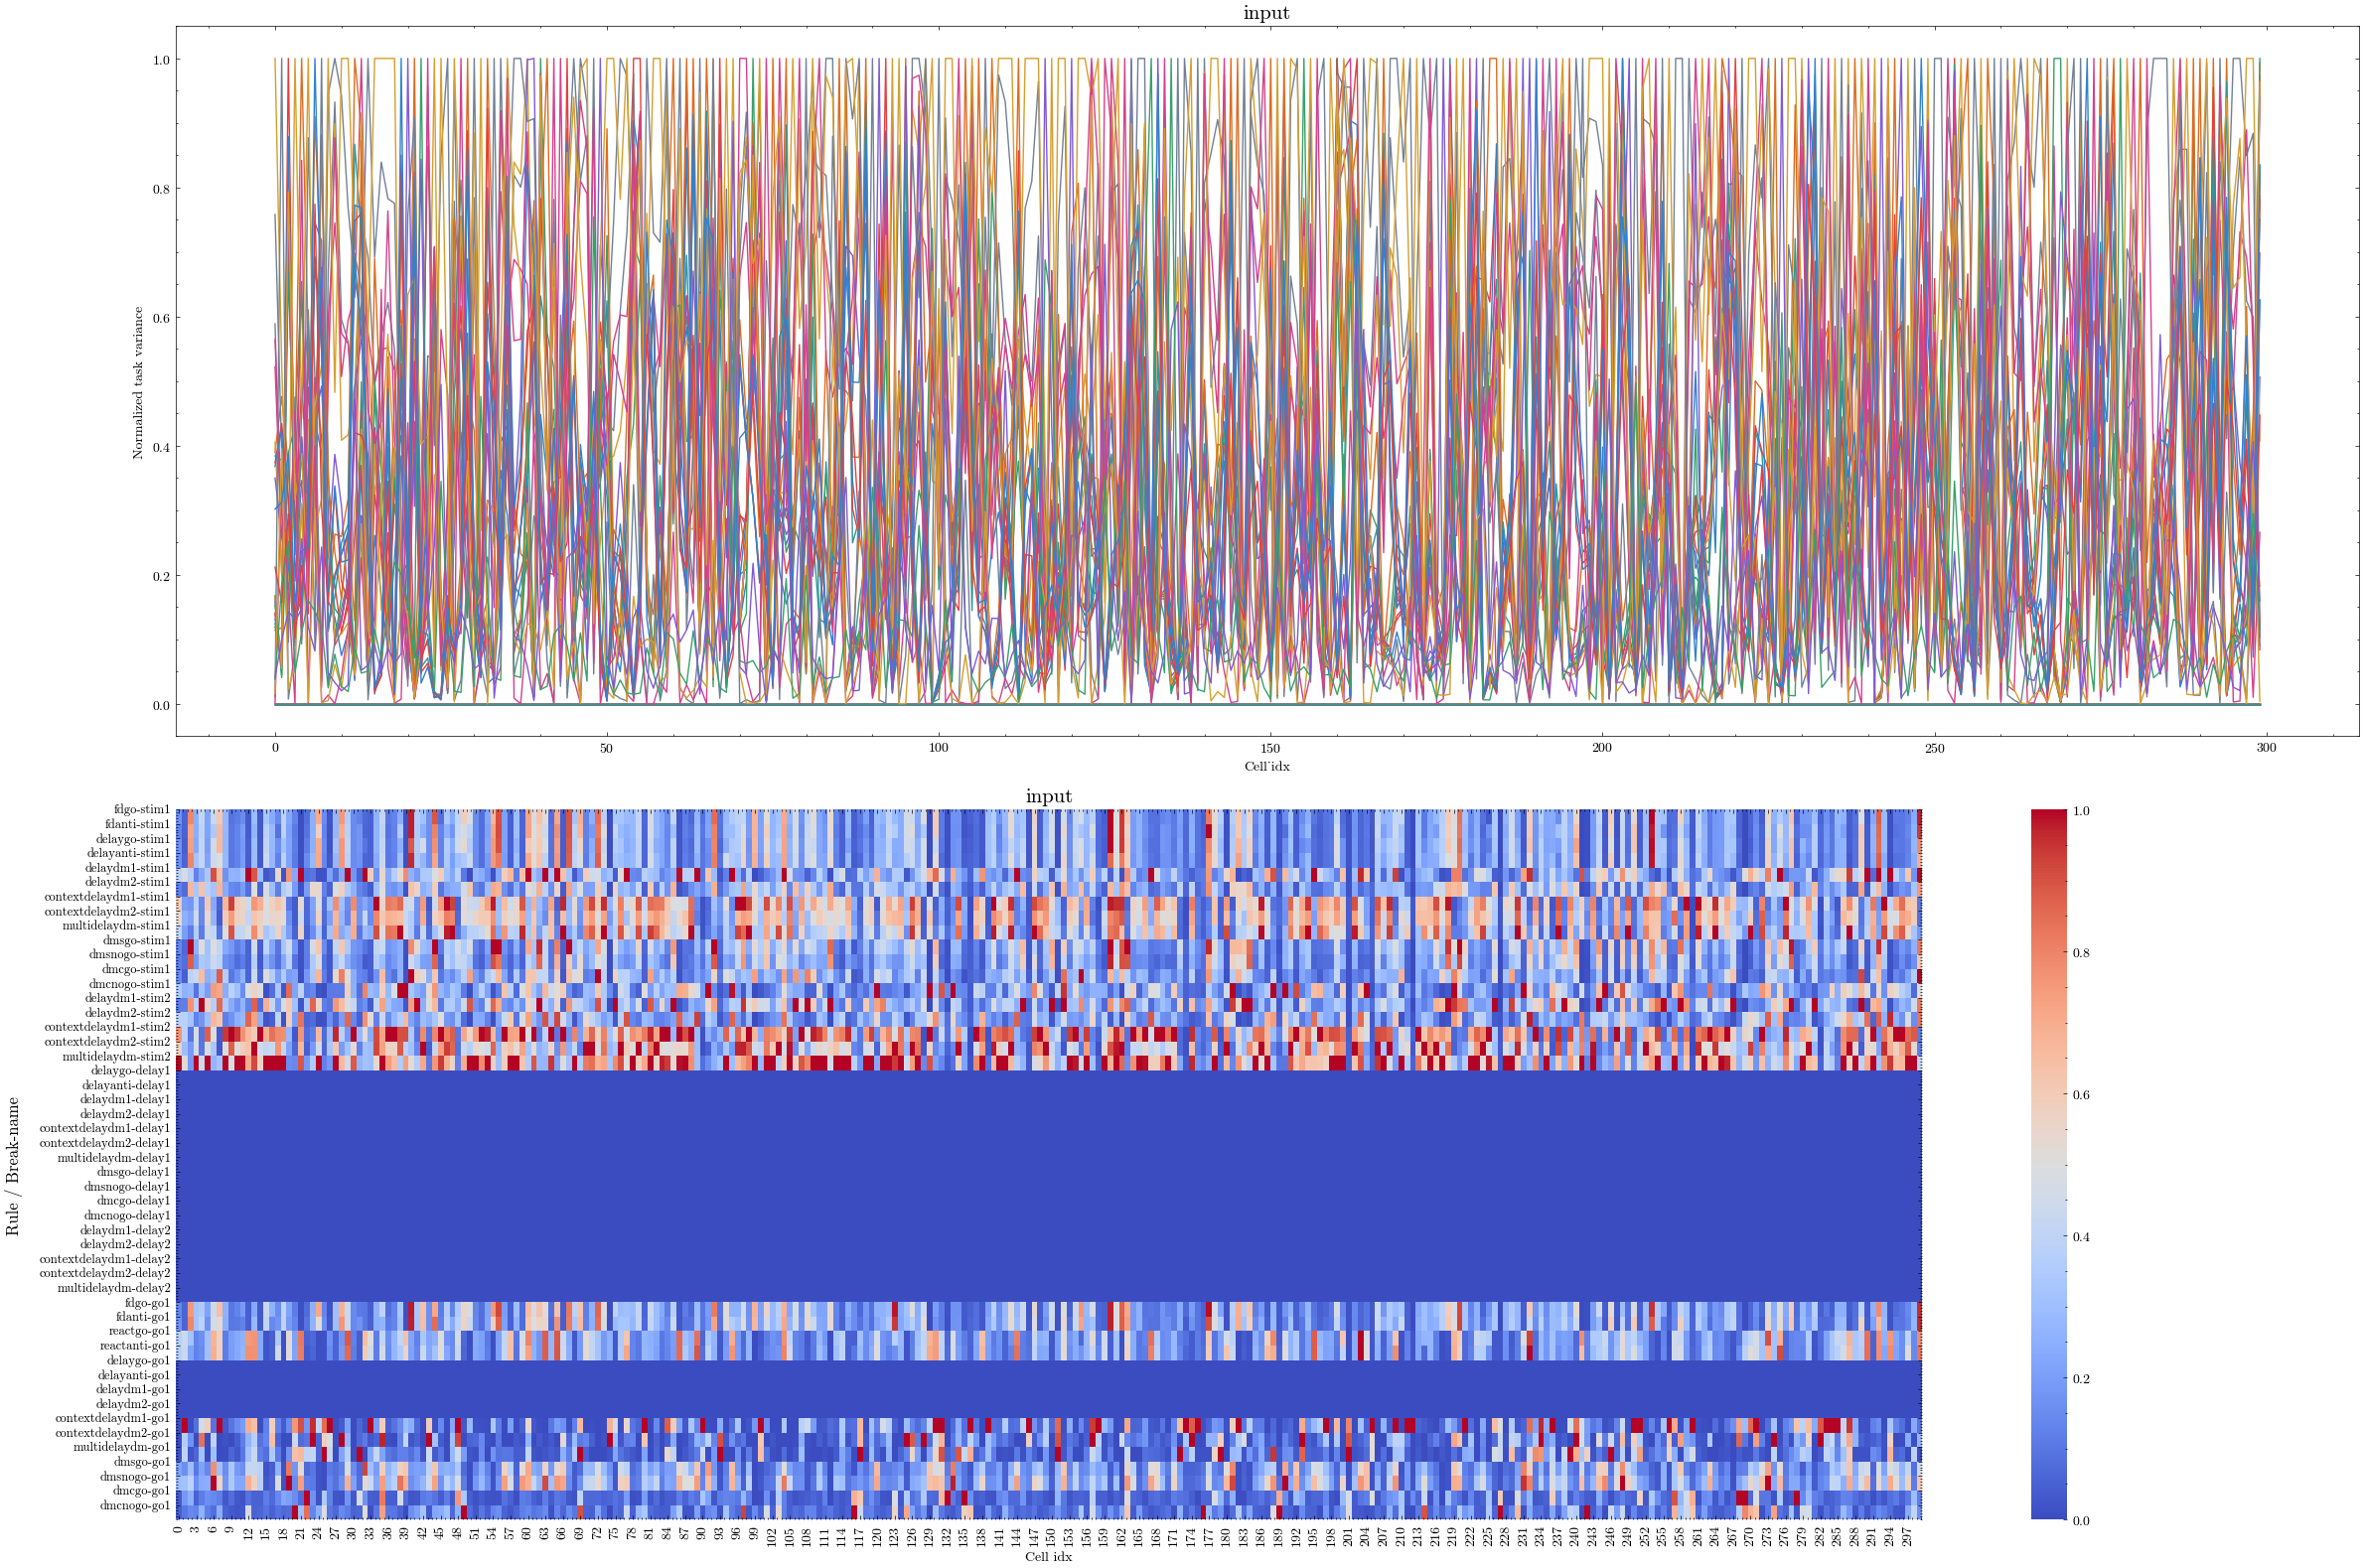

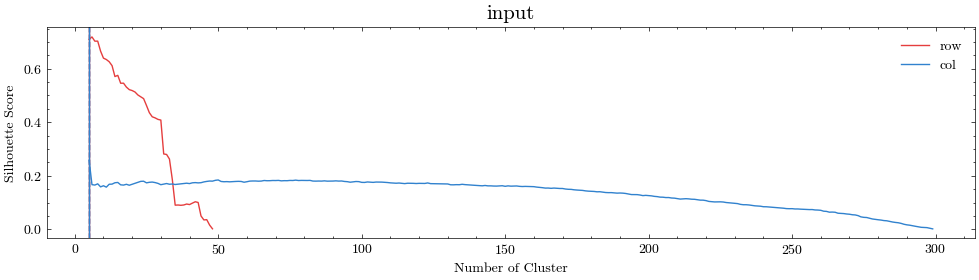

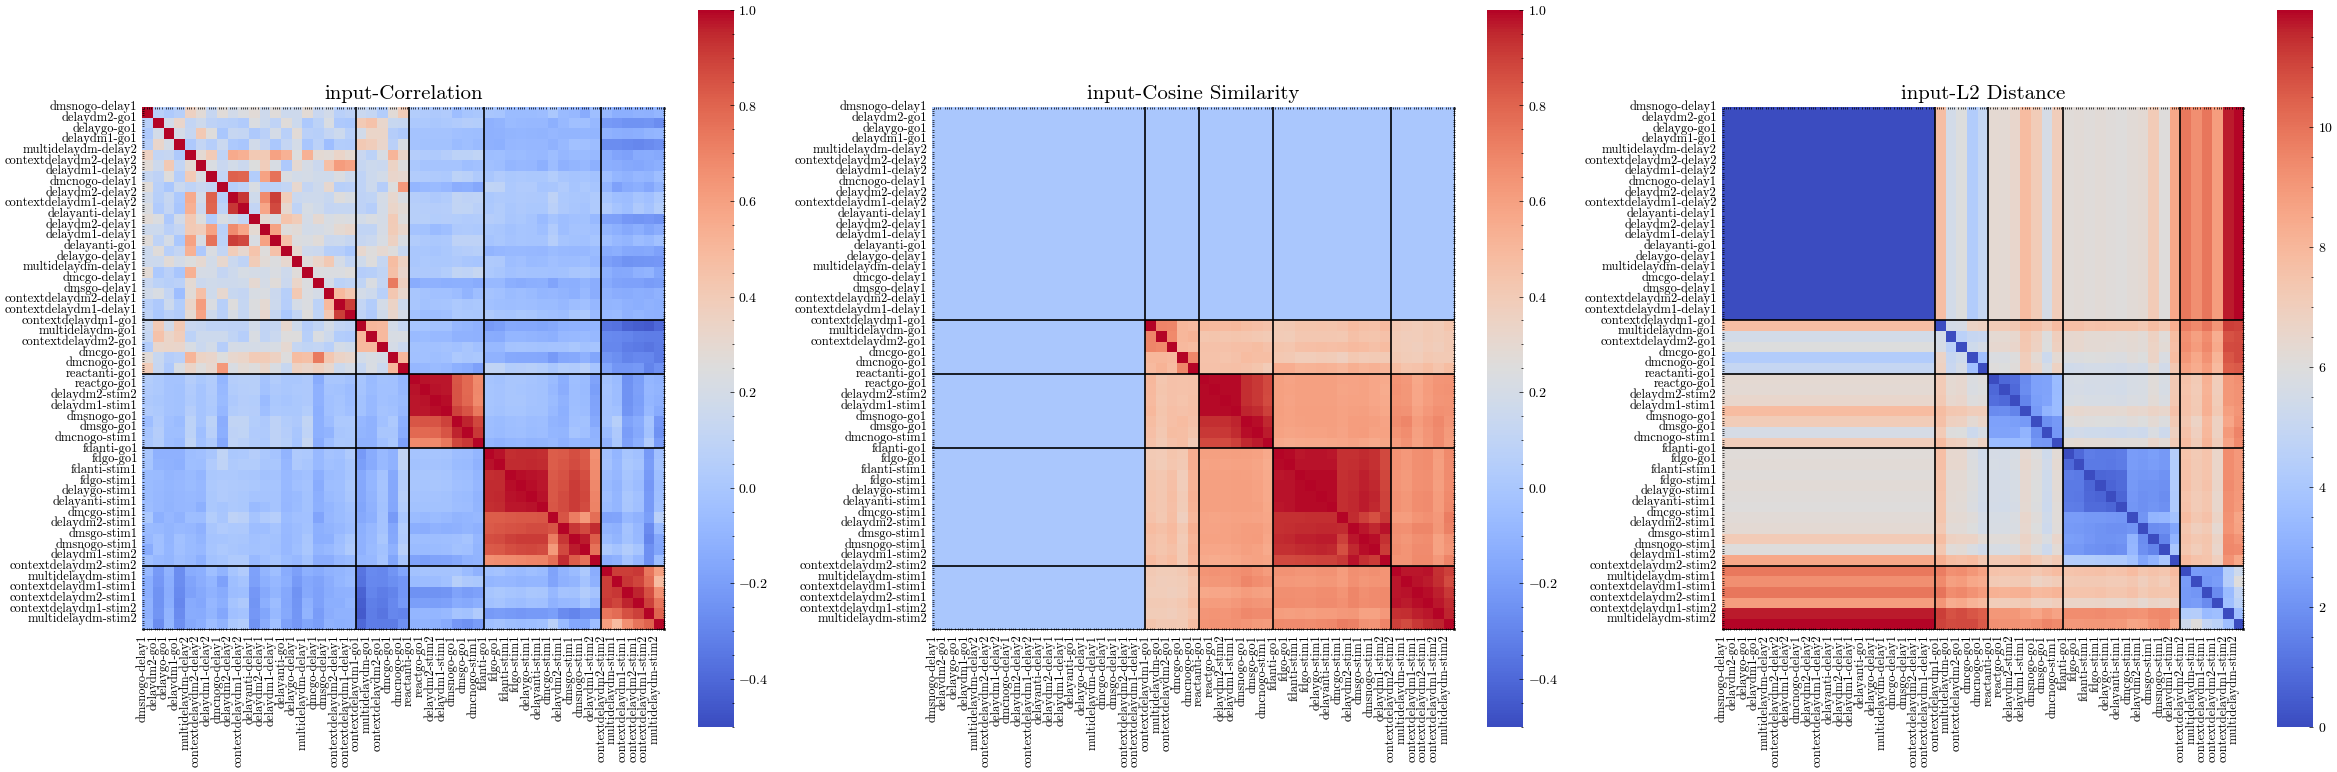

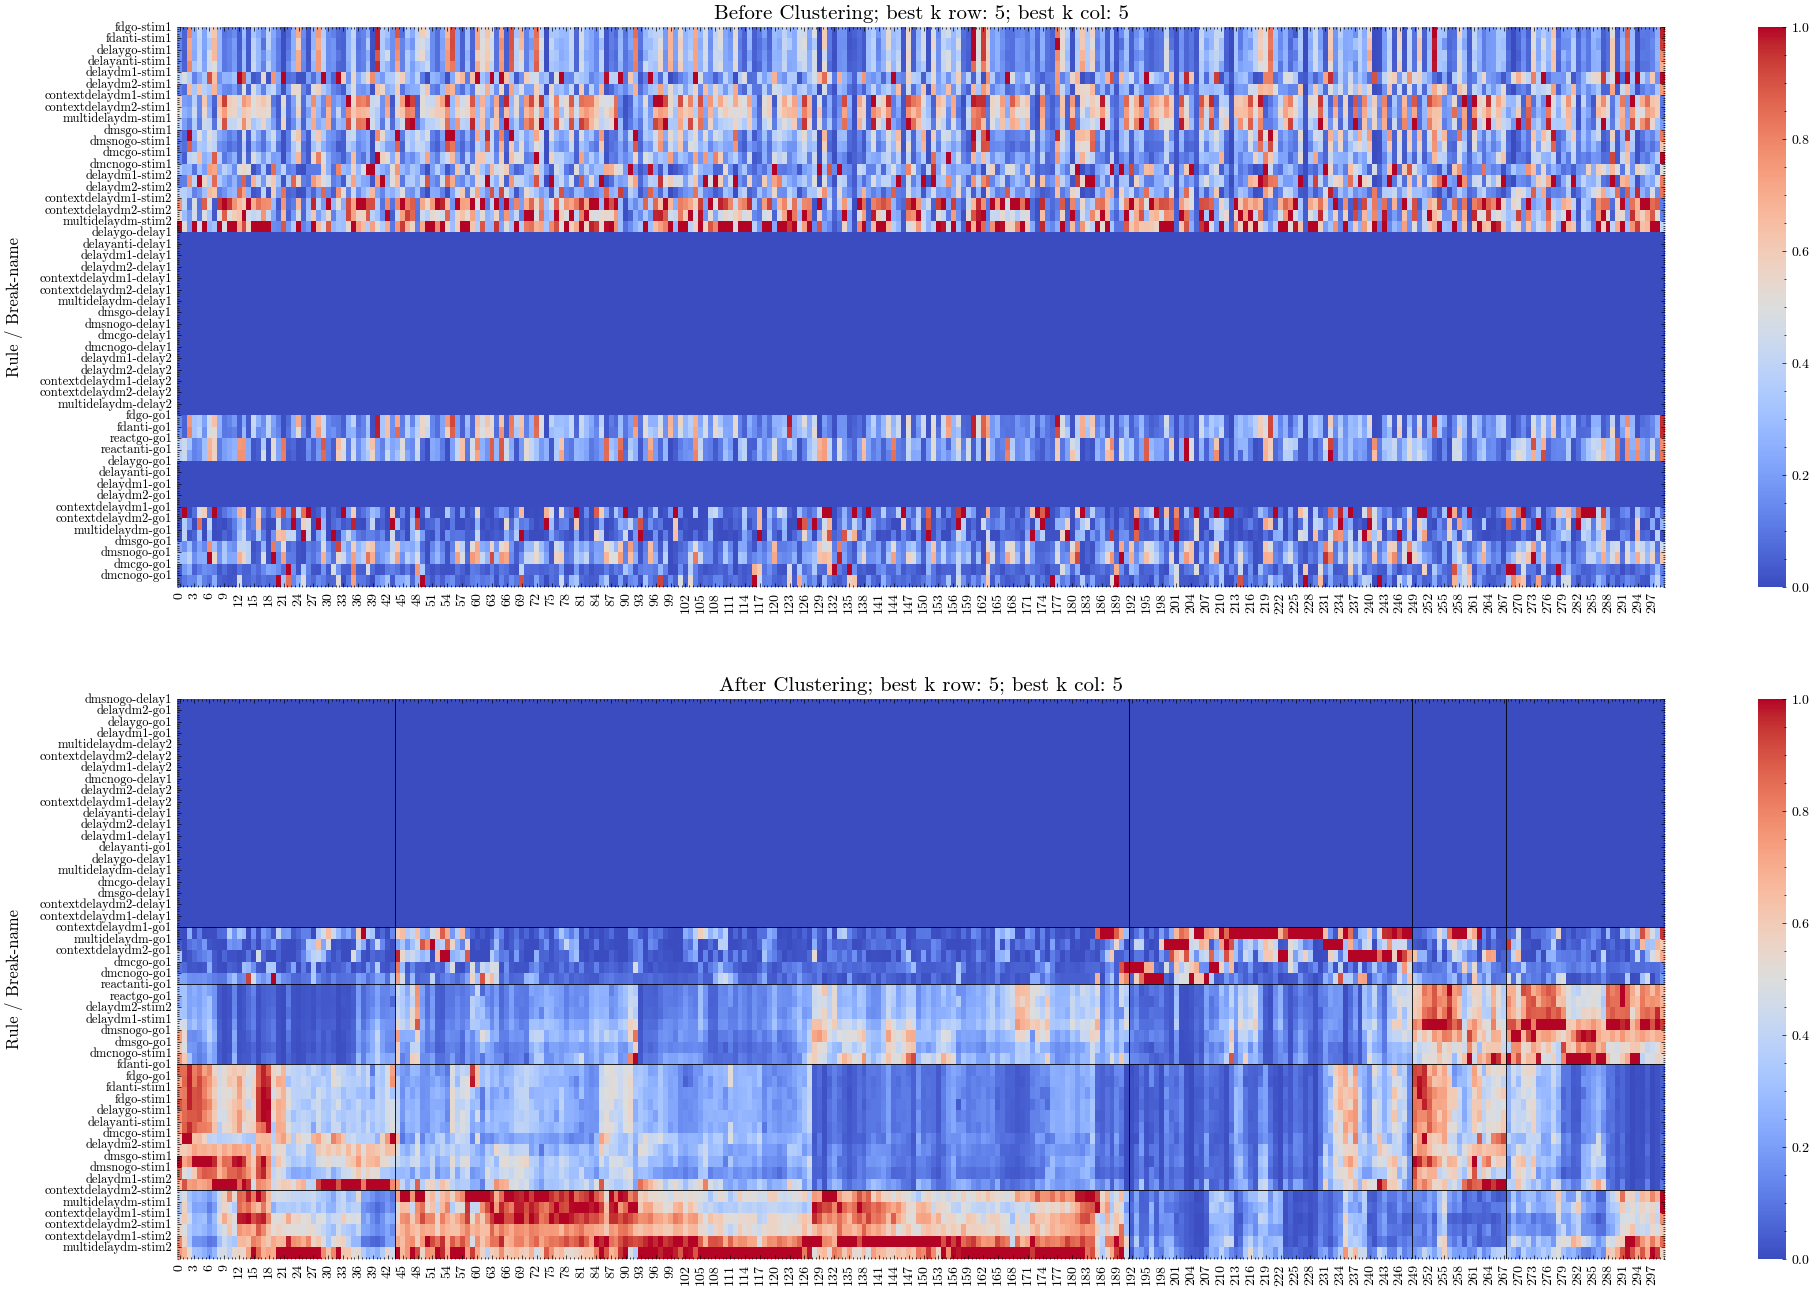

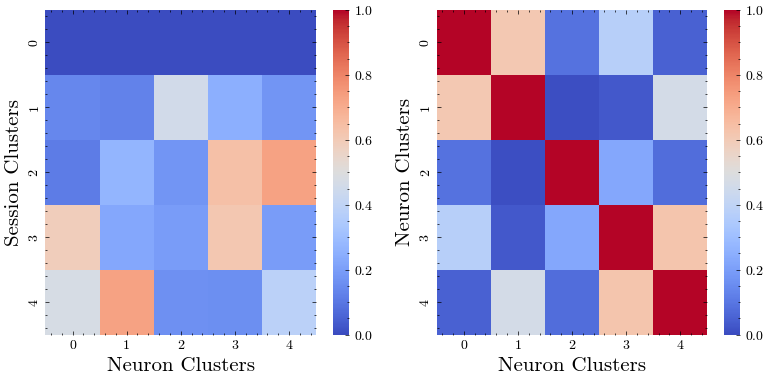

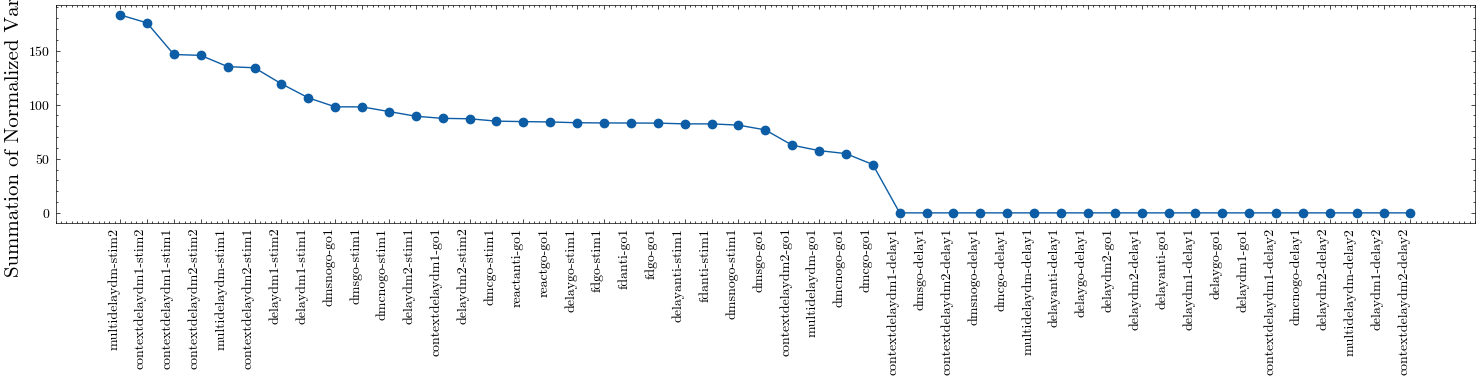

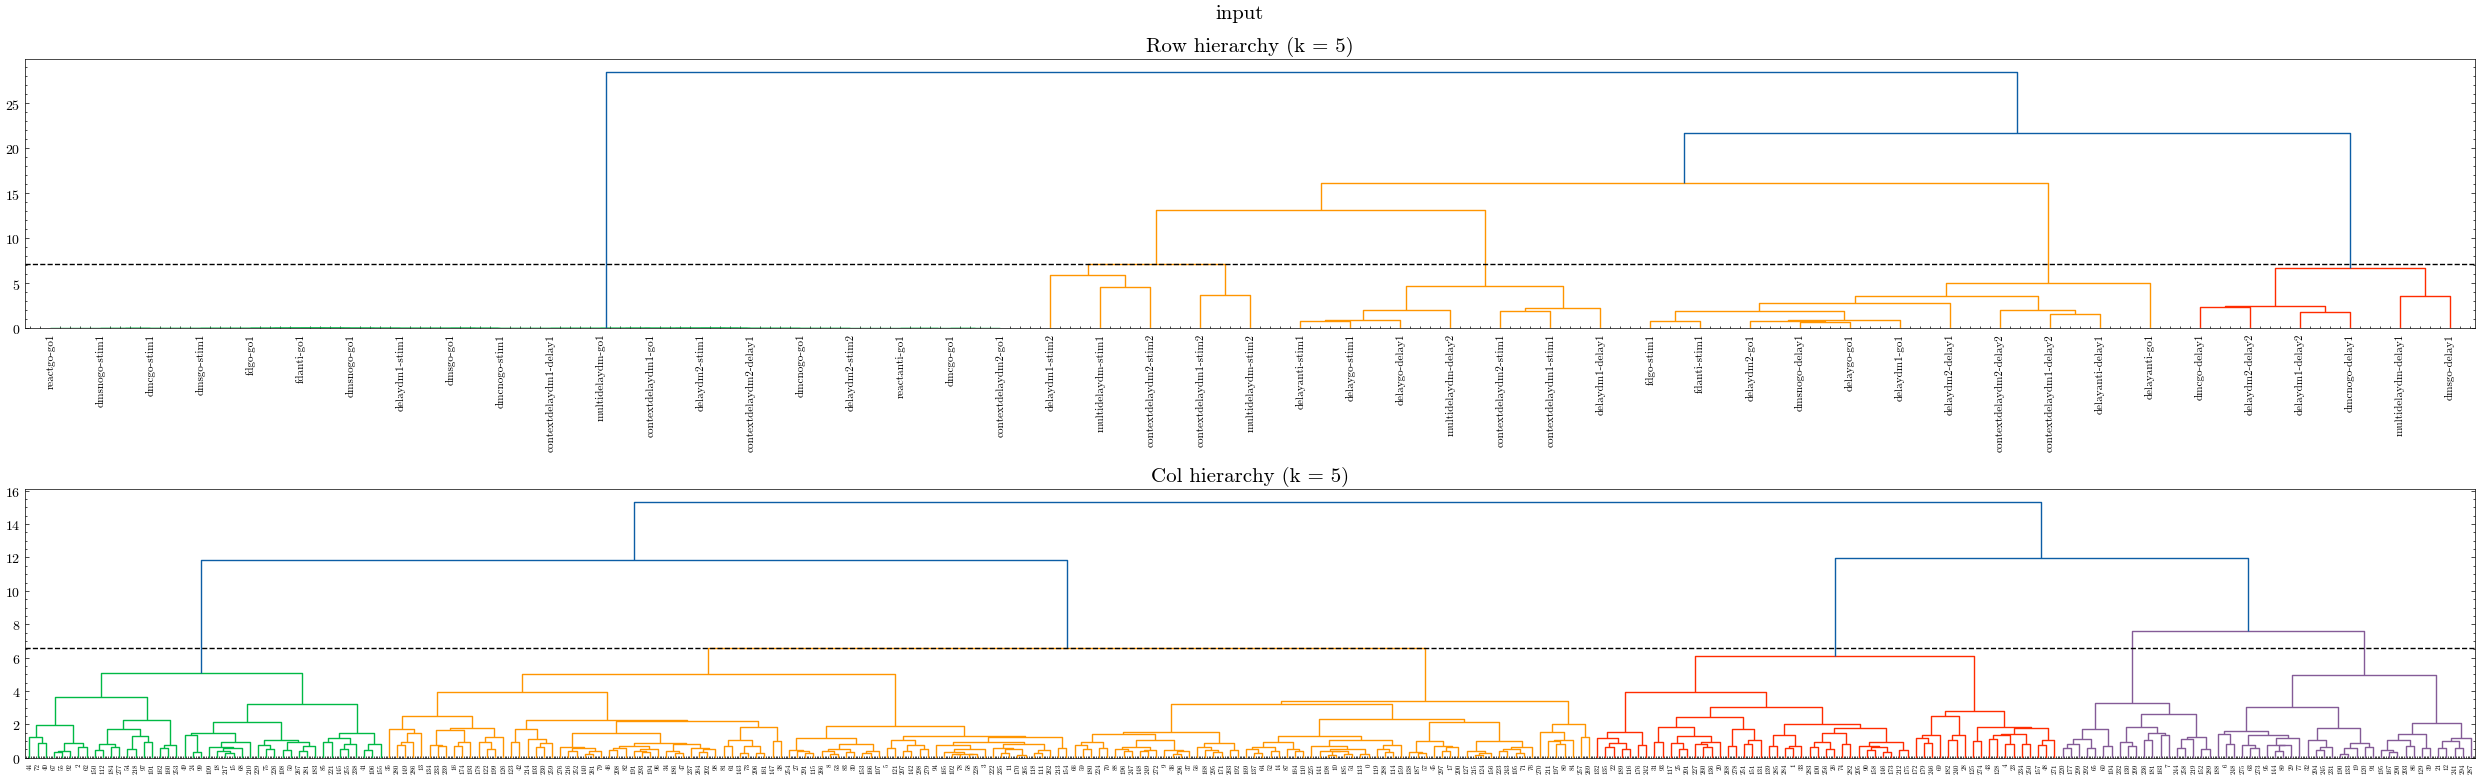

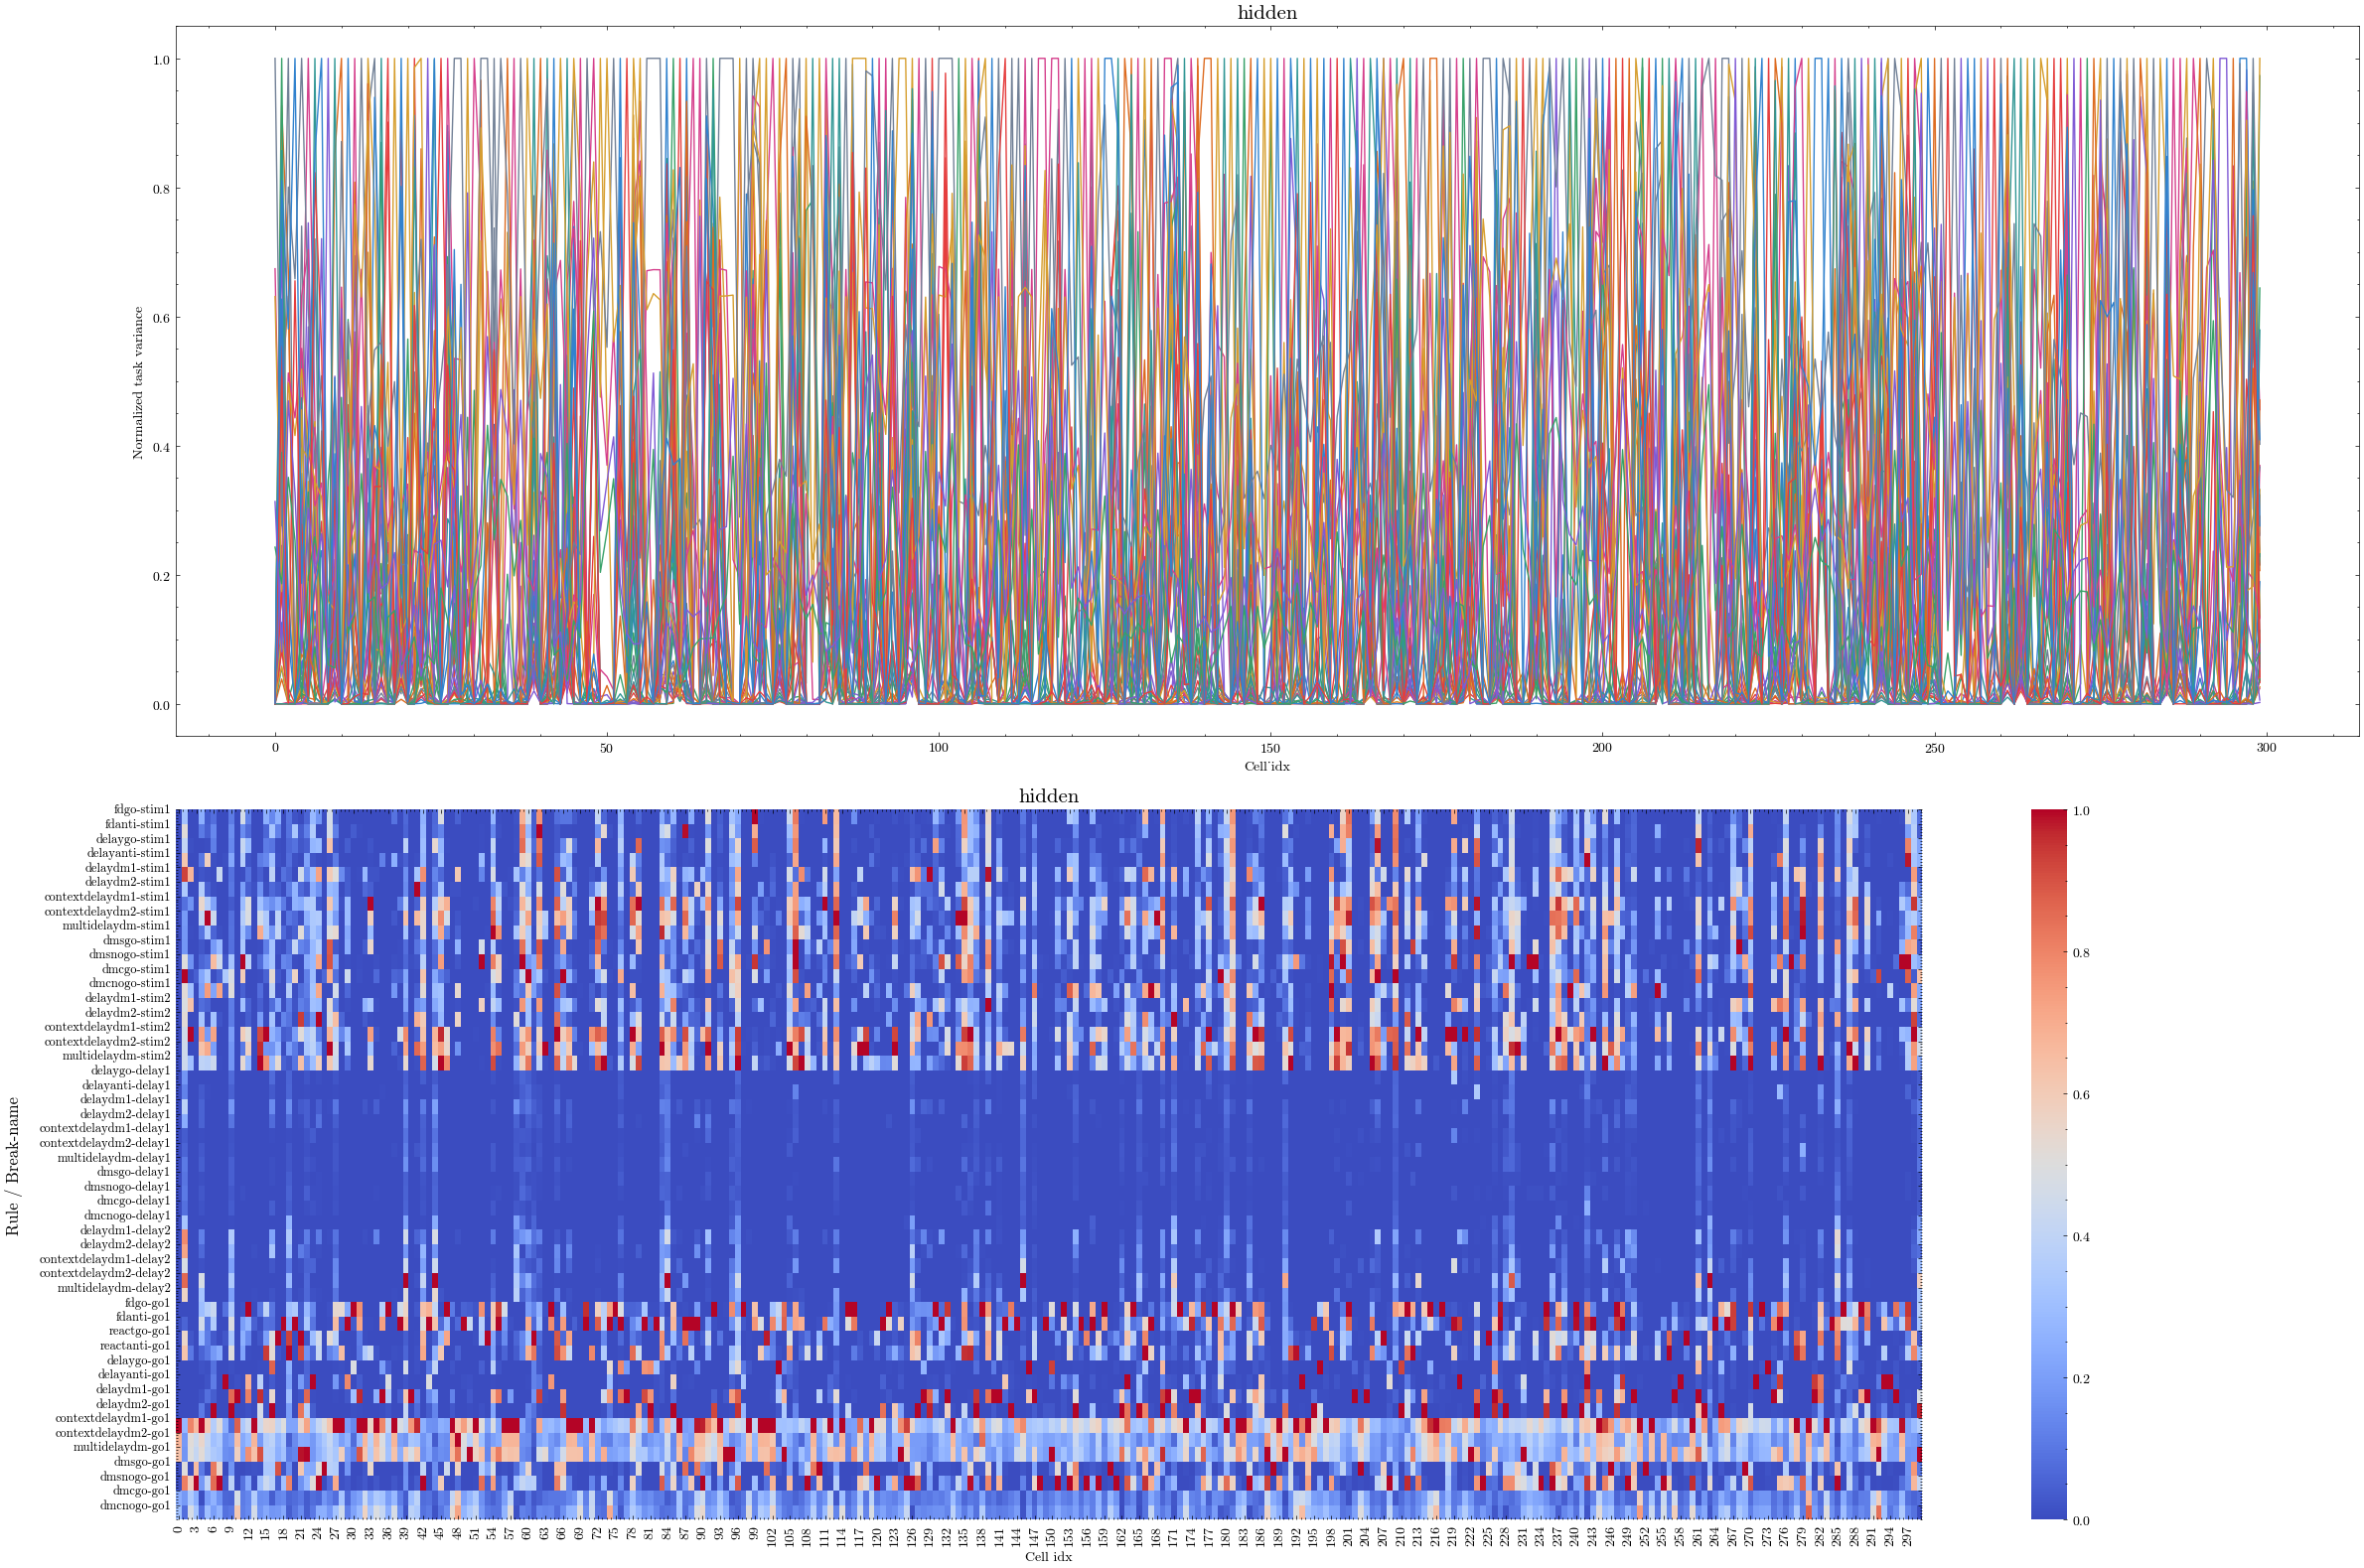

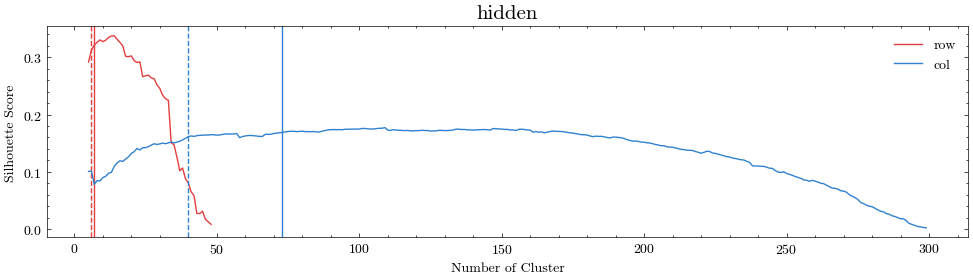

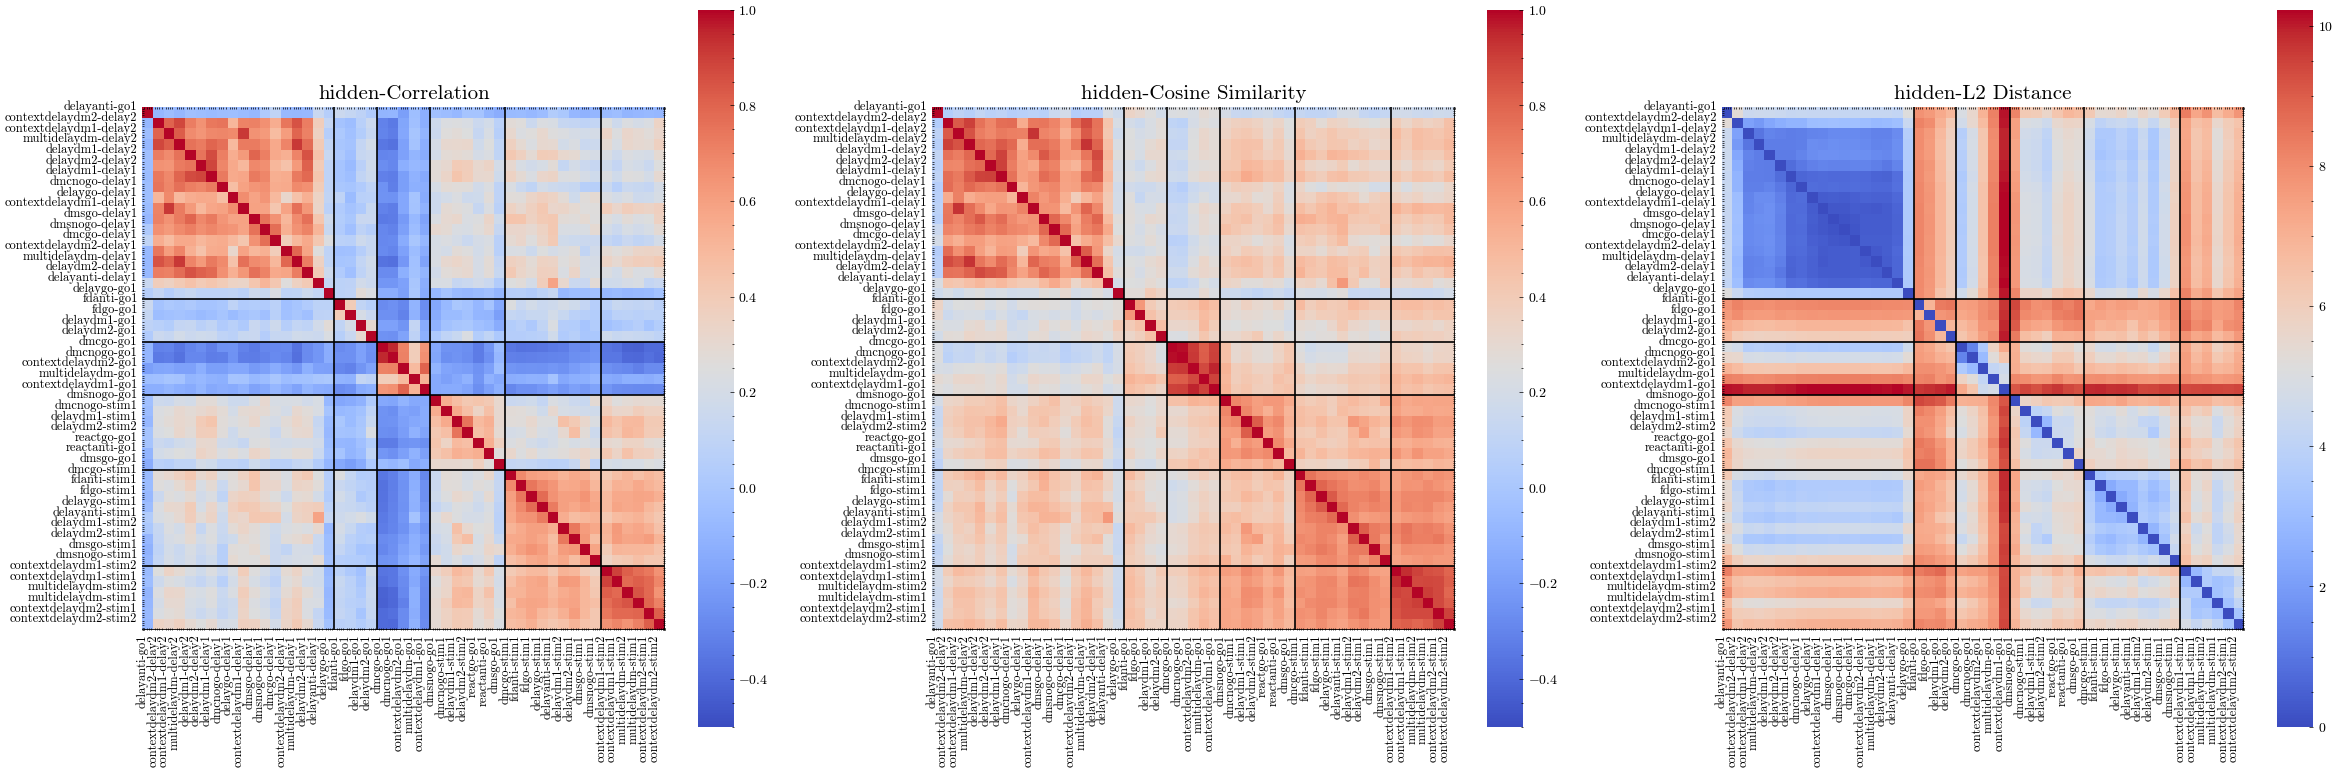

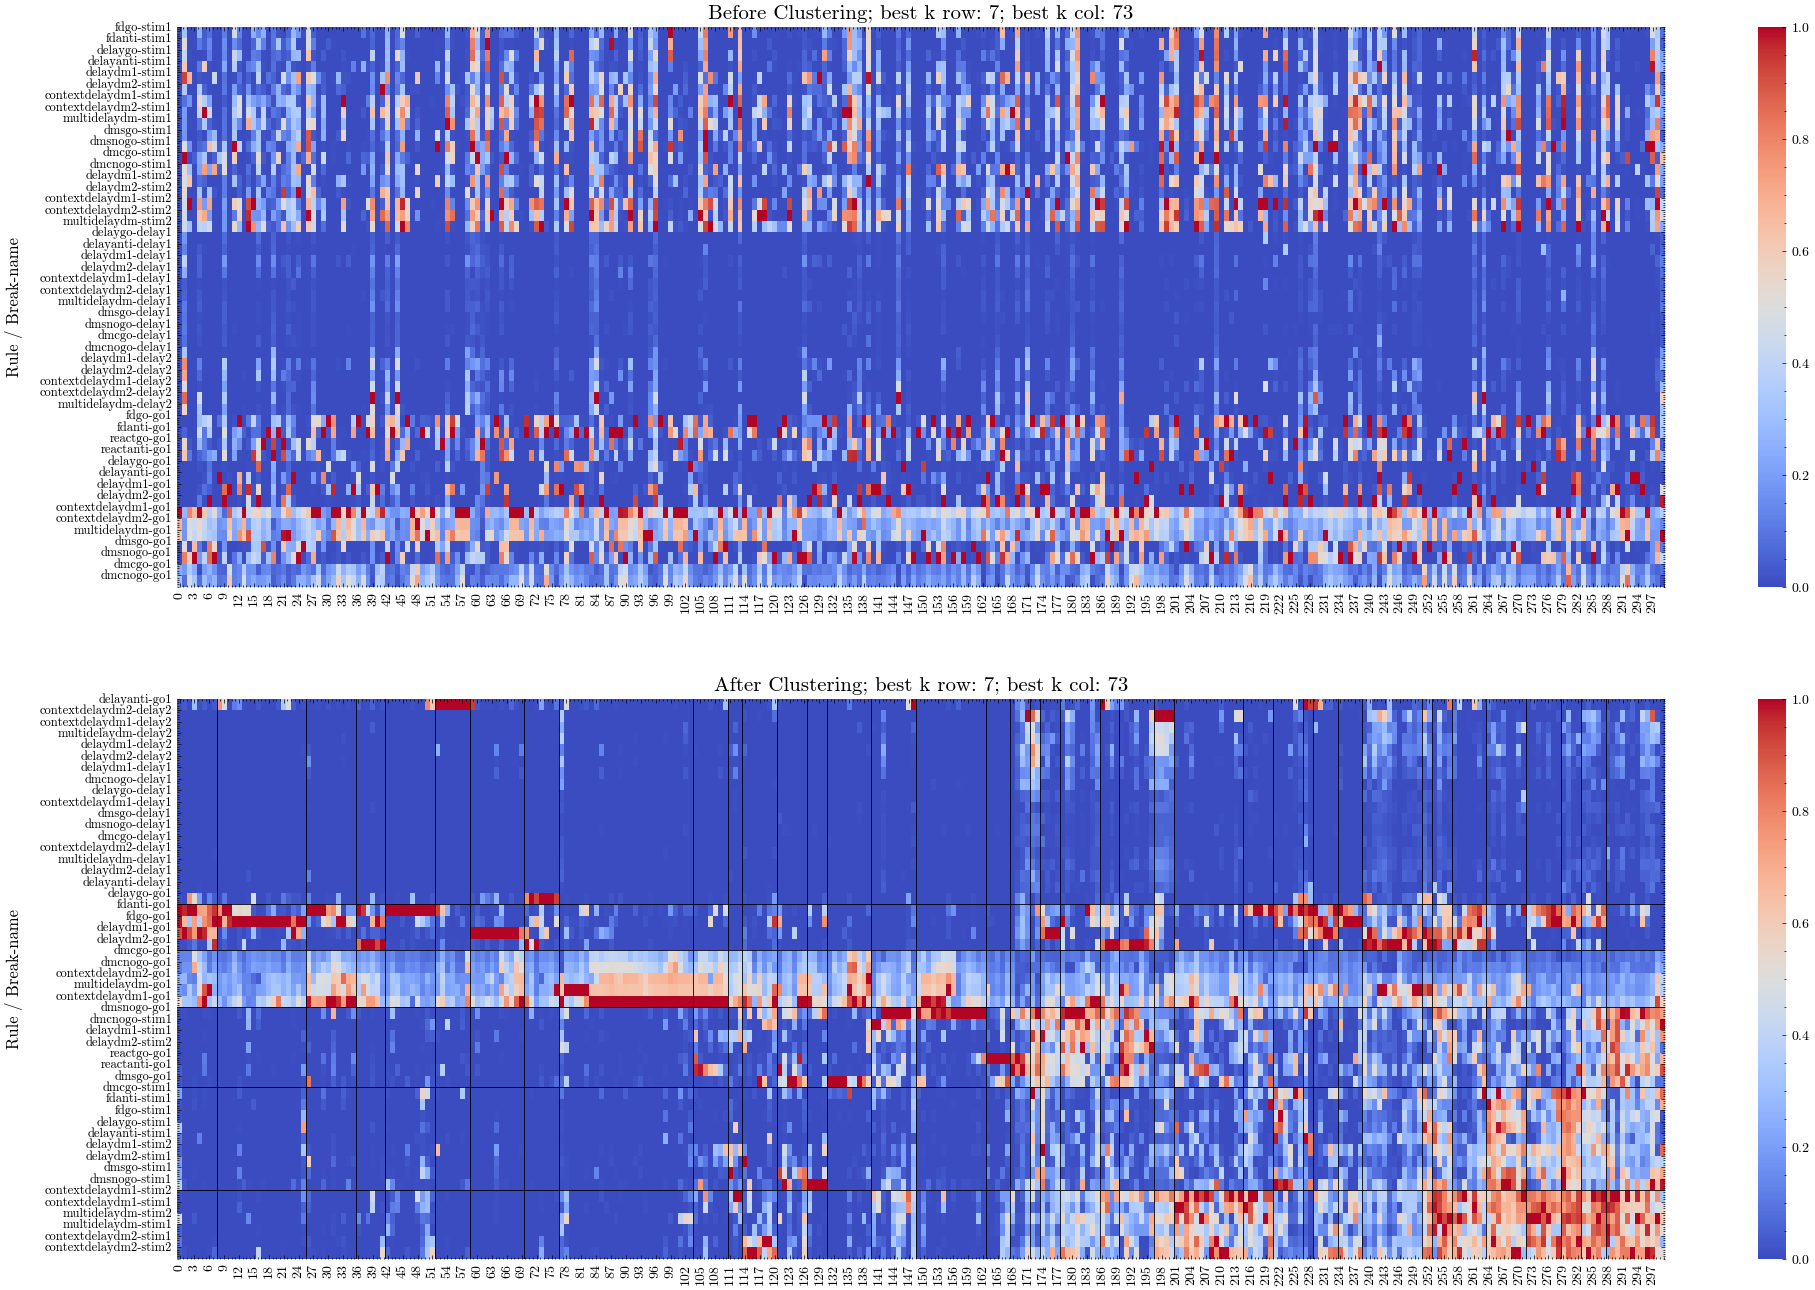

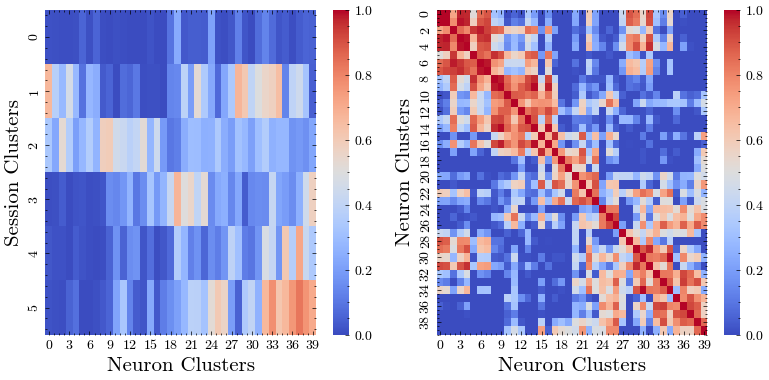

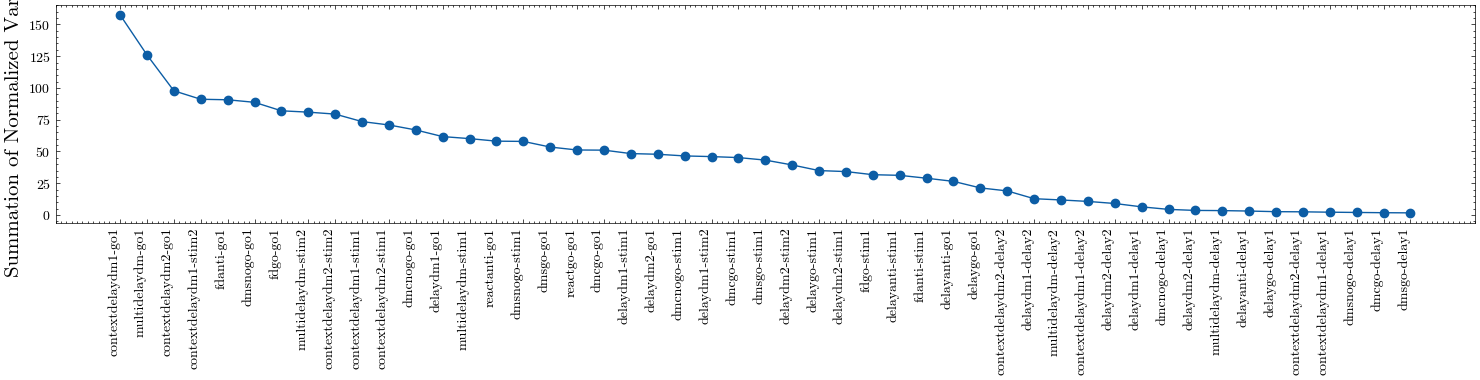

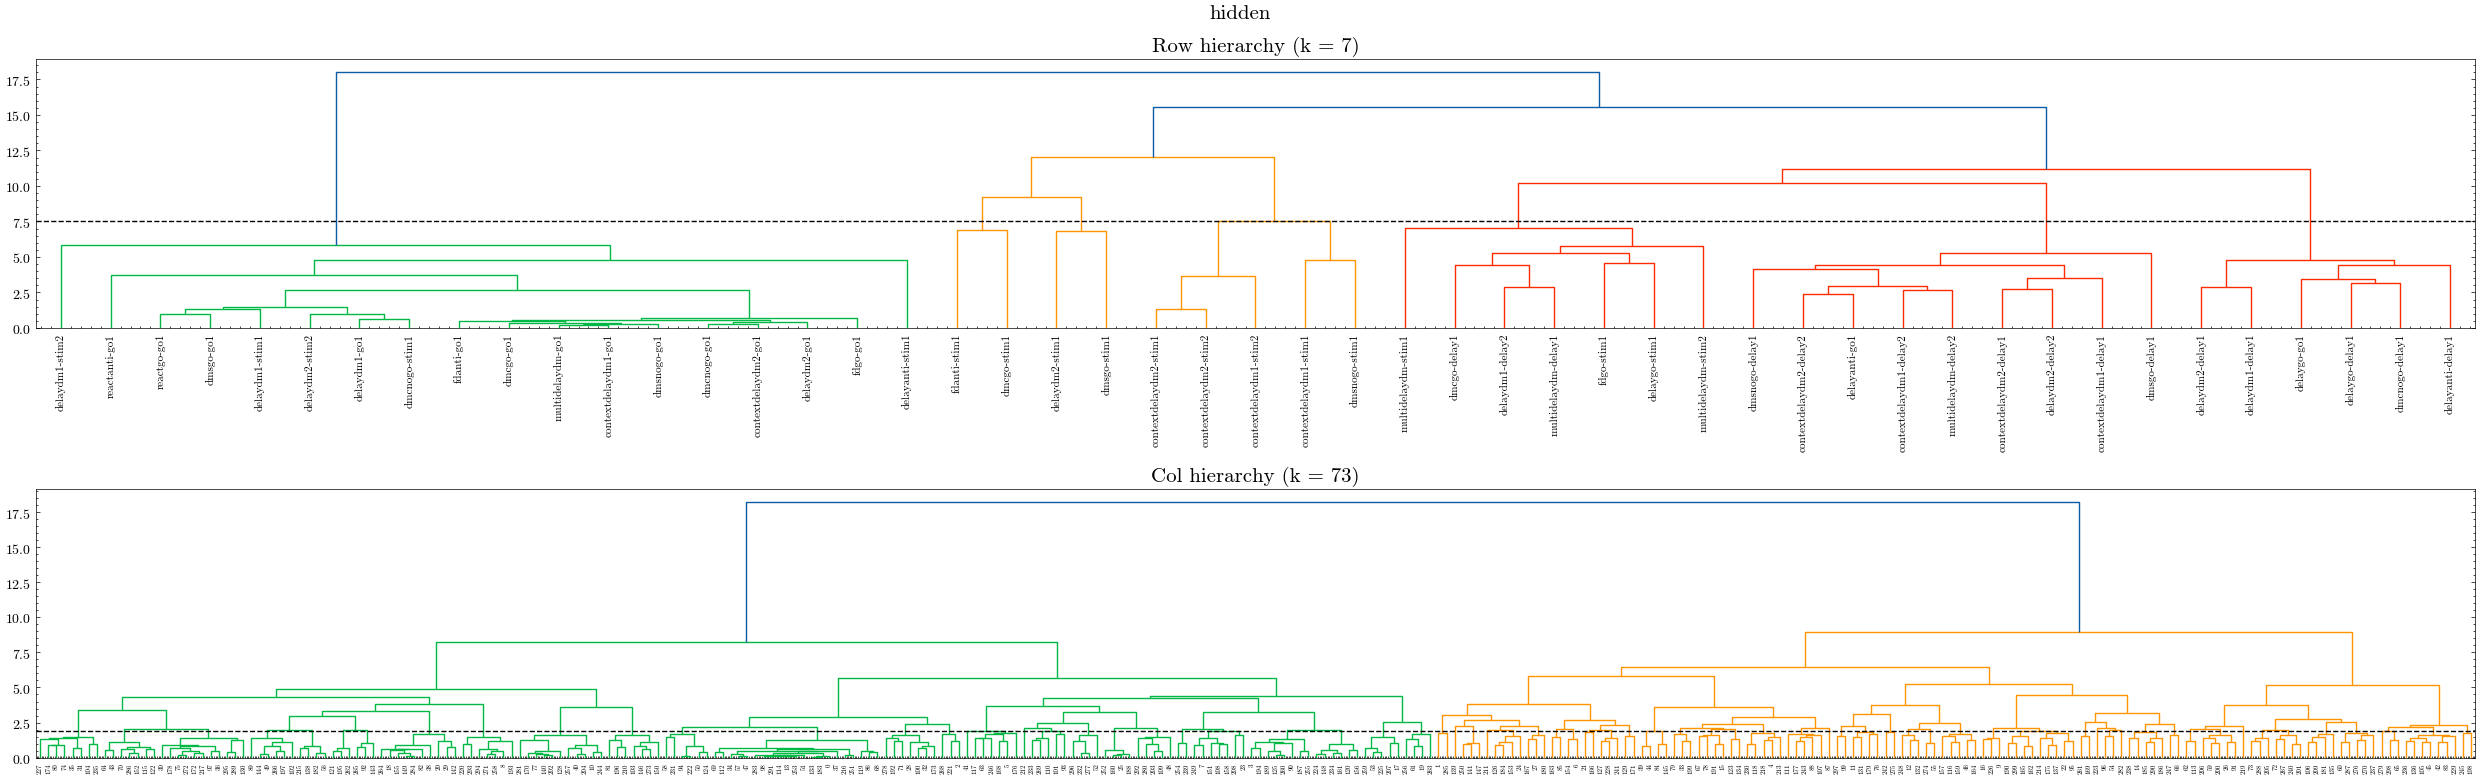

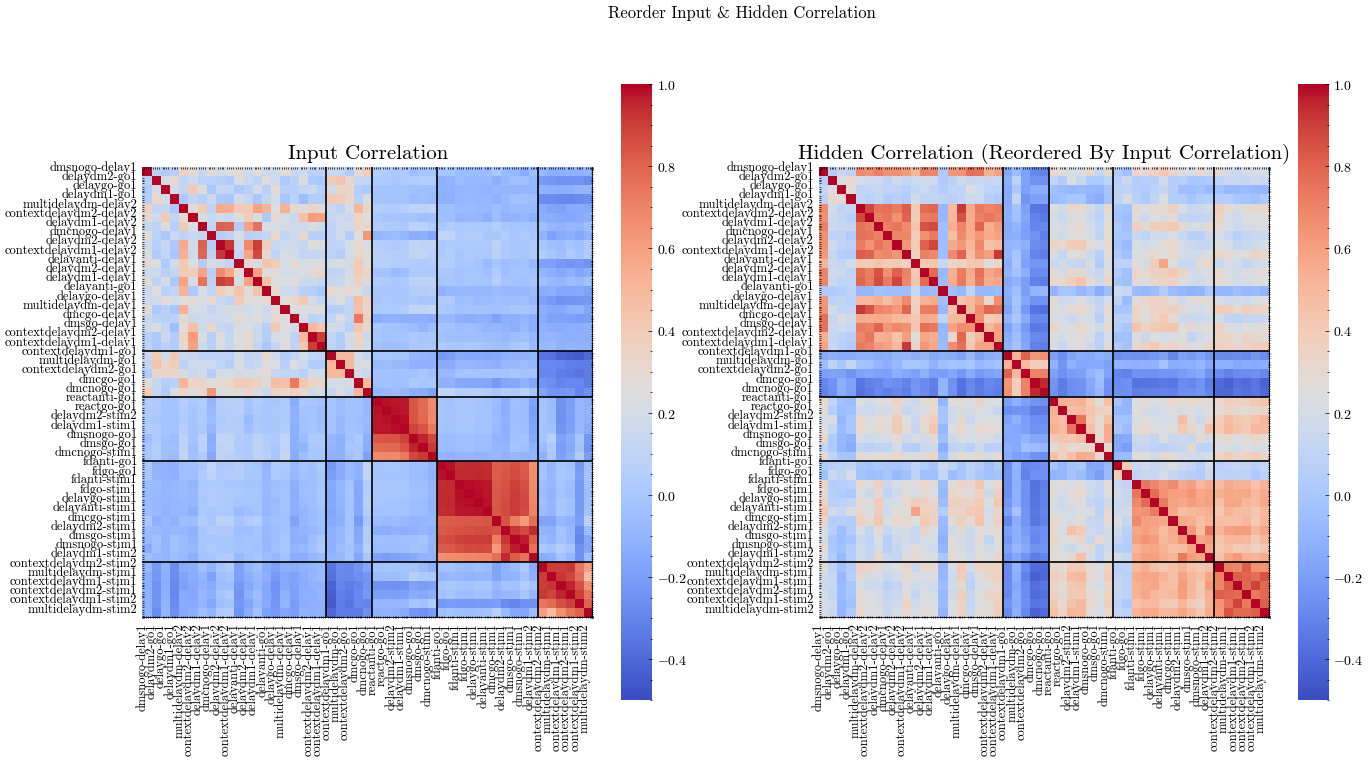

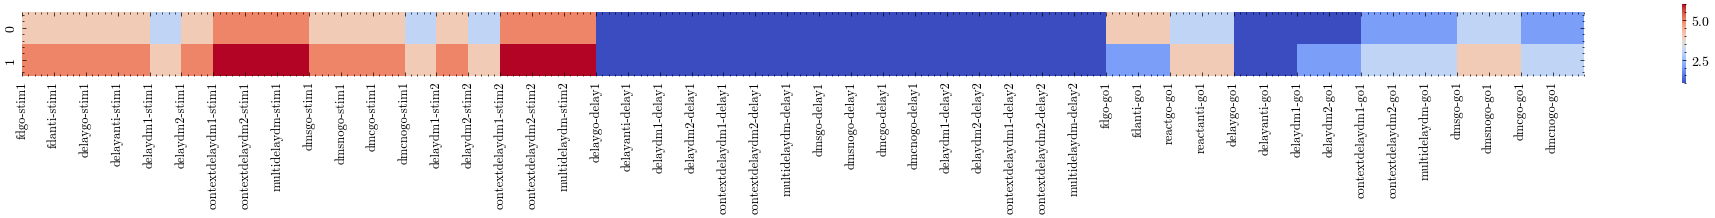

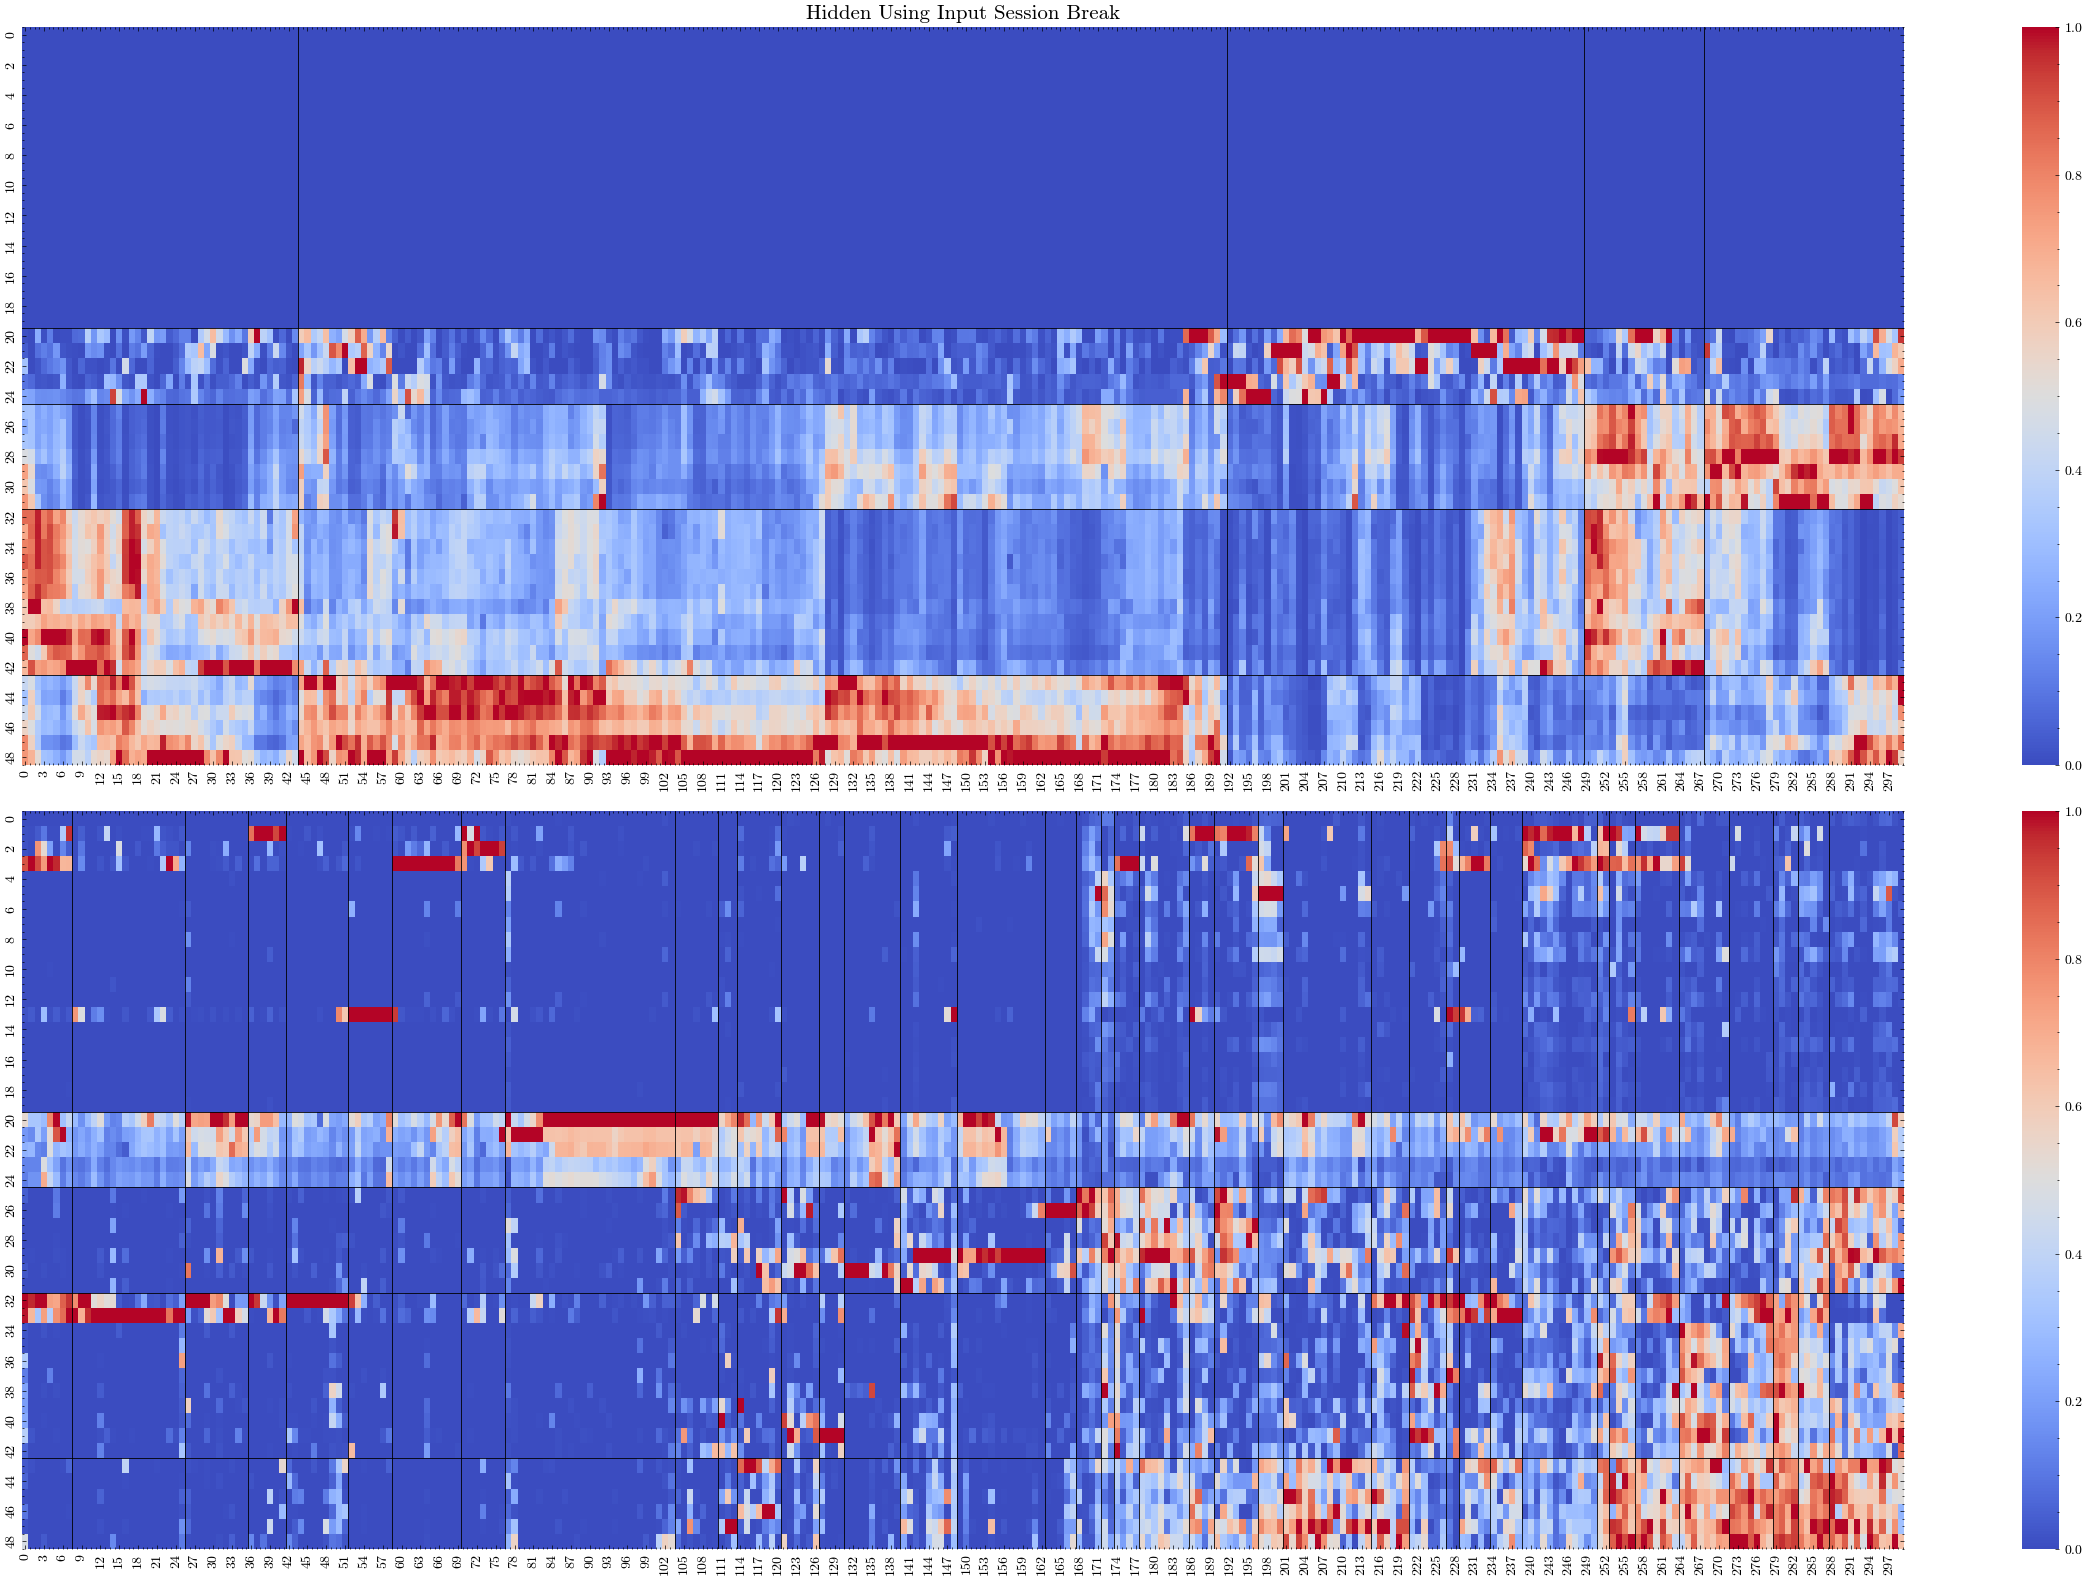

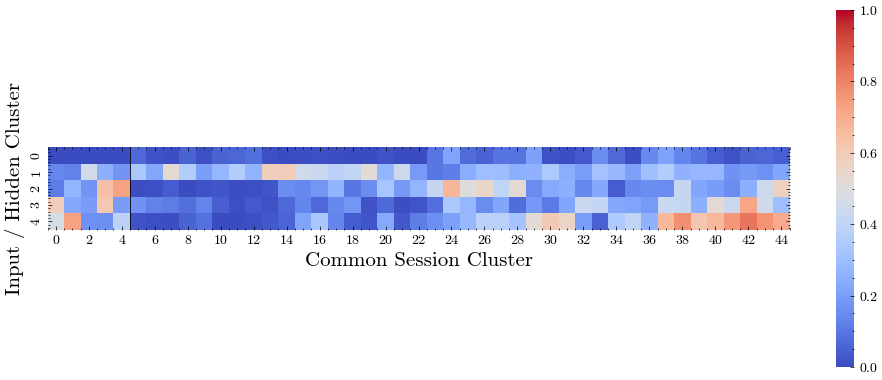

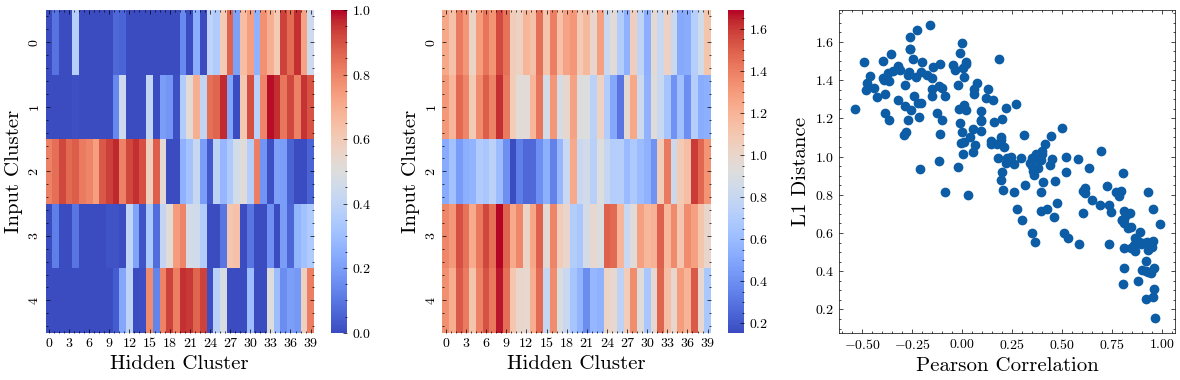

In [13]:
clustering_data_analysis = [xs, hs, Ms_orig]
clustering_data_analysis_names = ["input", "hidden", "modulation_all"]

clustering_data_hierarchy = {}
clustering_corr_info = []
col_clusters_all, row_clusters_all = [], []
row_cluster_breaker_all = []
input_hidden_comparison = []
base_data = []
metrics_all_all = []
rbreaks_all, cbreaks_all = [], []

selection_key = ["CH_blocks", "DB_blocks"]

upper_cluster = 300
lower_cluster = 5

for clustering_index in range(len(clustering_data_analysis)): 
    print("======================================================")
    clustering_data = clustering_data_analysis[clustering_index]
    clustering_name = clustering_data_analysis_names[clustering_index]
    print(f"clustering_name: {clustering_name}")
    
    if hyp_dict['ruleset'] == "everything": 
        phase_to_indices = [
            ("stim1",  [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
            ("stim2",  [6, 7, 8, 9, 10]),
            ("delay1", [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
            ("delay2", [6, 7, 8, 9, 10]),
            ("go1",    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        ]
    elif hyp_dict['ruleset'] == "contextdelaydm1":
        phase_to_indices = [
            ("stim1", [0]), 
            ("stim2", [0]), 
            ("delay1", [0]), 
            ("delay2", [0]), 
            ("go1", [0]), 
        ]

    elif hyp_dict['ruleset'] == "delaydm1":
        phase_to_indices = [
            ("stim1", [0]), 
            ("stim2", [0]), 
            ("delay1", [0]), 
            ("delay2", [0]), 
            ("go1", [0]), 
        ]

    elif hyp_dict['ruleset'] == "dmcgo":
        phase_to_indices = [
            ("stim1", [0]), 
            ("delay1", [0]), 
            ("go1", [0]), 
        ]
    
    tb_break = [
        [idx, rules_epochs[all_rules[idx]][phase]]
        for phase, indices in phase_to_indices
        for idx in indices
    ]
    
    tb_break_name = [
        f"{all_rules[idx]}-{phase}"
        for phase, indices in phase_to_indices
        for idx in indices
    ]
    
    tb_break_name = np.array(tb_break_name)
    
    cell_vars_rules = [] 
    
    for el in range(len(tb_break)):
        n_rules = len(task_params['rules'])
        n_cells = clustering_data.shape[-1]
            
        rule_idx, period_time = tb_break[el][0], tb_break[el][1]
        
        # print('Rule {} (idx {})'.format(all_rules[rule_idx], rule_idx))
        if len(clustering_data.shape) == 3:
            rule_cluster = clustering_data[test_task == rule_idx, period_time[0]:period_time[1], :]
            cell_vars_rules.append(np.var(rule_cluster, axis=(0, 1))) 
        else:
            clustering_data_old = clustering_data
            if "pre" in clustering_name:
                rule_cluster = clustering_data[test_task == rule_idx, period_time[0]:period_time[1]]
                mean_var = np.var(rule_cluster, axis=(0, 1)).mean(axis=0)
                cell_vars_rules.append(mean_var)
                
            elif "post" in clustering_name: 
                rule_cluster = clustering_data[test_task == rule_idx, period_time[0]:period_time[1]]
                mean_var = np.var(rule_cluster, axis=(0, 1)).mean(axis=1)
                cell_vars_rules.append(mean_var)
                
            elif "all" in clustering_name: 
                clustering_data = clustering_data.reshape(clustering_data.shape[0], clustering_data.shape[1], -1)
                rule_cluster = clustering_data[test_task == rule_idx, period_time[0]:period_time[1], :]
                cell_vars_rules.append(np.var(rule_cluster, axis=(0, 1))) 
                    
    cell_vars_rules = np.array(cell_vars_rules)    
    cell_vars_rules_norm = np.zeros_like(cell_vars_rules)

    print(f"cell_vars_rules.shape: {cell_vars_rules.shape}")
    
    # normalize
    cell_max_var = np.max(cell_vars_rules, axis=0) # Across rules
    print(f"cell_max_var.shape: {cell_max_var.shape}")

    for period_idx in range(len(tb_break)):
        cell_vars_rules_norm[period_idx] = np.where(
            cell_max_var > 0., cell_vars_rules[period_idx] / cell_max_var, 0.
        )

    # modulation only, reshape to (N, pre, post) shape after calculating the variance
    # N here as the number of sessions after breakdown
    if "all" in clustering_name: 
        N, MM = cell_vars_rules_norm.shape
        M = int(np.sqrt(MM))
        cell_vars_rules_norm_keepshape = cell_vars_rules_norm.reshape(N, M, M)
    
    # build rule-wise value lists and corresponding field names dynamically
    rule_vals  = [cell_vars_rules_norm[i].tolist() for i in range(n_rules)]
    # print(f"rule_vals: {rule_vals}")
    rule_names = [f"rule{i}" for i in range(n_rules)]
    
    # structured array whose fields are rule0, rule1, …, rule{n_rules-1}
    dtype = np.dtype([(name, float) for name in rule_names])
    rules_struct = np.array(list(zip(*rule_vals)), dtype=dtype)
    
    # sort_idxs = np.argsort(rules_struct, order=rule_names)[::-1] # descending lexicographic sort across all rule columns 
    sort_idxs = np.arange(rules_struct.shape[0], dtype=np.intp) # identity map 

    # July 7th: first sorting based on the normalized magnitude
    # all the following should be aligned with this change
    # Aug 22th: sort based on the variance ordering OR using an identity map (i.e. do nothing)
    cell_vars_rules_sorted_norm = cell_vars_rules_norm[:, sort_idxs]
    base_data.append(cell_vars_rules_sorted_norm)
    print(f"cell_vars_rules_sorted_norm: {cell_vars_rules_sorted_norm.shape}")

    # not plotting the modulation result for its large dimensionality
    if "all" not in clustering_name: 
        fig, ax = plt.subplots(2,1,figsize=(24,8*2))
        for period_idx in range(cell_vars_rules_sorted_norm.shape[0]): 
            ax[0].plot(cell_vars_rules_sorted_norm[period_idx], color=c_vals[period_idx], label=tb_break_name[period_idx])
        ax[0].set_xlabel('Cell_idx')
        ax[0].set_ylabel('Normalized task variance')
        ax[0].set_title(clustering_name, fontsize=15)
        
        sns.heatmap(cell_vars_rules_sorted_norm, ax=ax[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        ax[1].set_xlabel('Cell idx')
        ax[1].set_ylabel('Rule / Break-name', fontsize=12, labelpad=12)
        ax[1].set_yticks(np.arange(len(tb_break_name)))
        ax[1].set_yticklabels(tb_break_name, rotation=0, ha='right', va='center', fontsize=9)
        ax[1].set_title(clustering_name, fontsize=15)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/{clustering_name}_variance_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)   

    # analyze input and hidden
    if not ("all" in clustering_name): 
        # clustering & grouping & re-ordering
        # first loop on input, second loop in hidden
        result = clustering.cluster_variance_matrix_repeat(cell_vars_rules_sorted_norm, k_min=lower_cluster, k_max=upper_cluster, 
                                                           metric="euclidean", method="ward", n_repeats=100, silhouette_tol=0.05)
        
        eval_res = clustering_metric.evaluate_bicluster_clustering(
            cell_vars_rules_sorted_norm, row_labels=result["row_tol_labels"], col_labels=result["col_tol_labels"]
        )
        
        eval_metrics = eval_res["metrics"]
        eval_blocks = eval_res["blocks"]
        eval_stdmean = np.nanmedian(eval_blocks["std"] / eval_blocks["means"])

        eval_random_metrics_all = []
        eval_random_blocks_all = []
        for repeat in range(1000):
            rng = np.random.default_rng(seed=np.random.randint(0, 10000))
            row_arr = rng.permutation(result["row_tol_labels"])
            col_arr = rng.permutation(result["col_tol_labels"])
            eval_res_random = clustering_metric.evaluate_bicluster_clustering(
                cell_vars_rules_sorted_norm, row_labels=row_arr, col_labels=col_arr
            )
            eval_random_metrics_all.append(eval_res_random["metrics"])
            eval_random_blocks_all.append(eval_res_random["blocks"])

        eval_random_stdmean = [np.nanmedian(eval_random_blocks["std"] / eval_random_blocks["means"]) \
                                       for eval_random_blocks in eval_random_blocks_all]

        metrics_all = {}
        for metric_key in selection_key: 
            optimized_value = eval_metrics[metric_key]
            random_values = [eval_random_metrics[metric_key] for eval_random_metrics in eval_random_metrics_all]
            metrics_all[metric_key] = [optimized_value, np.mean(random_values), np.std(random_values, ddof=1)/np.sqrt(len(random_values))]

        metrics_all["std/mean"] = [eval_stdmean, np.mean(eval_random_stdmean), np.std(eval_random_stdmean, ddof=1)/np.sqrt(len(eval_random_stdmean))]
        print(f"metrics_all: {metrics_all}")
        
        # registeration
        metrics_all_all.append(metrics_all) 

        input_hidden_comparison.append([result, cell_vars_rules_sorted_norm])
        
        cell_vars_rules_sorted_norm_ordered = cell_vars_rules_sorted_norm[np.ix_(result["row_order"], result["col_order"])]
        
        rl = np.asarray(result["row_tol_labels"])[result["row_order"]]
        cl = np.asarray(result["col_tol_labels"])[result["col_order"]]
        rbreaks = clustering._breaks(rl)
        cbreaks = clustering._breaks(cl)
        rbreaks_all.append(rbreaks); cbreaks_all.append(cbreaks)

        best_k_row, best_k_col = result["row_k"], result["col_k"]
        best_alt_k_row, best_alt_k_col = result["row_tol_k"], result["col_tol_k"]
        print(f"best_k_row: {best_k_row}; best_k_col: {best_k_col}")
        print(f"best_alt_k_row: {best_alt_k_row}; best_alt_k_col: {best_alt_k_col}")
        
        row_t, col_t = result["row_cut_threshold"], result["col_cut_threshold"] 

        # extract the grouping information, i.e. which neuron belong to which cluster
        # instead of the view of dendrogram
        # 2025-10-20: we register the tolerant version of optimal cluster selection
        col_labels, col_k = result["col_tol_labels"], result["col_tol_k"]
        # group the neuron based on the labels
        col_clusters = {int(lab): np.where(col_labels == lab)[0] for lab in np.unique(col_labels)}
        # 2025-11-04: do similar things for row separation
        # we checked so that the cluster label (name) is monotonically increasing 
        # i.e. near by cluster (e.g. cluster 1 and cluster 2) should be more similiar in population 
        # as well, since increasing the cutoff threshold in dendrogram will "merge" these clusters
        row_labels, row_k = result["row_tol_labels"], result["row_tol_k"]
        row_clusters = {int(lab): np.where(row_labels == lab)[0] for lab in np.unique(row_labels)}
        # registeration
        col_clusters_all.append(col_clusters)
        row_clusters_all.append(row_clusters)
        
        # plot the optimization score as a function of number of clustering
        # also plot the indicator for the optimal number of cluster (and with tolerance version)
        figscore, axscore = plt.subplots(1,1,figsize=(10,3))
        axscore.plot(result["row_score_recording_mean"].keys(), result["row_score_recording_mean"].values(), 
                     label="row", color=c_vals[0])
        axscore.axvline(best_k_row, color=c_vals[0], linestyle="-")
        axscore.axvline(best_alt_k_row, color=c_vals[0], linestyle="--")
        axscore.plot(result["col_score_recording_mean"].keys(), result["col_score_recording_mean"].values(), 
                     label="col", color=c_vals[1])
        axscore.axvline(best_k_col, color=c_vals[1], linestyle="-")
        axscore.axvline(best_alt_k_col, color=c_vals[1], linestyle="--")
        axscore.set_xlabel("Number of Cluster")
        axscore.set_ylabel("Silhouette Score")
        axscore.legend()
        axscore.set_title(f"{clustering_name}", fontsize=15)
        figscore.tight_layout()
        figscore.savefig(f"./multiple_tasks/{clustering_name}_variance_cluster_score_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # 
        ordered_row_name = tb_break_name[result["row_order"]]
        row_breakers = [0]
        for row_group in row_clusters.values():
            row_breakers.append(row_breakers[-1] + len(row_group))
        row_breakers = row_breakers[1:]
        print(f"row_breakers: {row_breakers}")
        row_cluster_breaker_all.append(row_breakers)
        
        # pearson correlation matrix
        figcorr, axcorrs = plt.subplots(1,3,figsize=(8*3,8))
        metrics = ["Correlation", "Cosine Similarity", "L2 Distance"]
        cell_vars_rules_sorted_norm_ordered_measure = np.corrcoef(cell_vars_rules_sorted_norm_ordered, rowvar=True)
        cell_vars_rules_sorted_norm_ordered_measure_cos = cosine_similarity(cell_vars_rules_sorted_norm_ordered)
        cell_vars_rules_sorted_norm_ordered_measure_L2  = squareform(pdist(cell_vars_rules_sorted_norm_ordered, metric='euclidean'))

        # set uniform colorbar to cross-compare between analysis
        sns.heatmap(cell_vars_rules_sorted_norm_ordered_measure, cmap="coolwarm", square=True, vmin=-0.5, vmax=1.0, ax=axcorrs[0])
        sns.heatmap(cell_vars_rules_sorted_norm_ordered_measure_cos, cmap="coolwarm", square=True, vmin=-0.5, vmax=1.0, ax=axcorrs[1])
        sns.heatmap(cell_vars_rules_sorted_norm_ordered_measure_L2, cmap="coolwarm", square=True, ax=axcorrs[2])

        for axcorr_index in range(len(axcorrs)): 
            axcorr = axcorrs[axcorr_index]
            # plot the group information (delimiter between different cluster)
            nn = cell_vars_rules_sorted_norm_ordered_measure.shape[0]
            boundaries = row_breakers
            for b in boundaries:
                axcorr.axvline(b, 0, 1, color="k", linewidth=1.2)
                axcorr.axhline(b, 0, 1, color="k", linewidth=1.2)
            
            axcorr.set_xticks(np.arange(len(tb_break_name)))
            axcorr.set_xticklabels(tb_break_name[result["row_order"]], rotation=90, ha='right', va='center', \
                                   rotation_mode='anchor', fontsize=9)    
            axcorr.set_yticks(np.arange(len(tb_break_name)))
            axcorr.set_yticklabels(tb_break_name[result["row_order"]], rotation=0, ha='right', va='center', \
                                   rotation_mode='anchor', fontsize=9) 
            axcorr.tick_params(axis="both", length=0)
            axcorr.set_title(f"{clustering_name}-{metrics[axcorr_index]}", fontsize=15)
        
        figcorr.tight_layout()
        figcorr.savefig(f"./multiple_tasks/{clustering_name}_variance_cluster_corr_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # register correlation information
        clustering_corr_info.append([
            cell_vars_rules_sorted_norm_ordered_measure, ordered_row_name, result["col_order"]
        ])

        # plot the effect of grouping & ordering through the feature axis
        fig, ax = plt.subplots(2,1,figsize=(24,8*2))
        sns.heatmap(cell_vars_rules_sorted_norm, ax=ax[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_ordered, ax=ax[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        for rb in rbreaks:
            ax[1].axhline(rb, color="k", lw=0.6)
        for cb in cbreaks:
            ax[1].axvline(cb, color="k", lw=0.6)
        ax[0].set_title(f"Before Clustering; best k row: {best_k_row}; best k col: {best_k_col}", fontsize=15)
        ax[0].set_ylabel('Rule / Break-name', fontsize=12, labelpad=12)
        ax[0].set_yticks(np.arange(len(tb_break_name)))
        ax[0].set_yticklabels(tb_break_name, rotation=0, ha='right', va='center', fontsize=9)
        ax[1].set_title(f"After Clustering; best k row: {best_k_row}; best k col: {best_k_col}", fontsize=15)
        ax[1].set_ylabel('Rule / Break-name', fontsize=12, labelpad=12)
        ax[1].set_yticks(np.arange(len(tb_break_name)))
        ax[1].set_yticklabels(tb_break_name[result["row_order"]], rotation=0, ha='right', va='center', fontsize=9)    
        fig.savefig(f"./multiple_tasks/{clustering_name}_variance_cluster_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # 2025-11-04: for plotting purpose
        rbreaks_ = [0] + rbreaks + [cell_vars_rules_sorted_norm_ordered.shape[0]]
        cbreaks_ = [0] + cbreaks + [cell_vars_rules_sorted_norm_ordered.shape[1]]
        figvarmean, axsvarmean = plt.subplots(1,2,figsize=(4*2,4))
        varmean = np.zeros((len(rbreaks_) - 1, len(cbreaks_) - 1))
        for rr in range(len(rbreaks_) - 1):
            for cc in range(len(cbreaks_) - 1):
                # 2025-11-04: mean covariance in this bicluster
                varmean_ = np.mean(cell_vars_rules_sorted_norm_ordered[rbreaks_[rr]:rbreaks_[rr+1], cbreaks_[cc]:cbreaks_[cc+1]])
                varmean[rr,cc] = varmean_
        sns.heatmap(varmean, ax=axsvarmean[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        axsvarmean[0].set_ylabel("Session Clusters", fontsize=15)
        axsvarmean[0].set_xlabel("Neuron Clusters", fontsize=15)
        # 2025-11-04: for sanity check; since the neuron clusters are ordered so that the adjacent ones 
        # are more similar to each other than the ones that are further, therefore the correlation matrix
        # should have larger value near the diagonal 
        varmeanC = np.corrcoef(varmean, rowvar=False) 
        sns.heatmap(varmeanC, ax=axsvarmean[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        axsvarmean[1].set_xlabel("Neuron Clusters", fontsize=15)
        axsvarmean[1].set_ylabel("Neuron Clusters", fontsize=15)
        figvarmean.tight_layout()
        figvarmean.savefig(f"./multiple_tasks/{clustering_name}_variance_cluster_mean_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # plot the norm of normalized variance of each session (across the neuron dimension)
        session_norm = cell_vars_rules_sorted_norm_ordered.sum(axis=1)
        norm_order = np.argsort(-session_norm)
        session_norm = session_norm[norm_order]
        session_norm_name = (tb_break_name[result["row_order"]])[norm_order]
        fig, ax = plt.subplots(1,1,figsize=(15,4))
        ax.plot([i for i in range(len(session_norm))], session_norm, "-o")
        ax.set_xticks([i for i in range(len(session_norm))])
        ax.set_xticklabels(session_norm_name, rotation=90, ha="right")
        ax.set_ylabel("Summation of Normalized Variance", fontsize=15)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/{clustering_name}_variance_norm_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)
        
        # plot hierarchy of grouping 
        fig, axs = plt.subplots(2,1,figsize=(25,4*2))
        dendrogram(result["row_linkage"], ax=axs[0], labels=tb_break_name[result["row_order"]], leaf_rotation=90)
        axs[0].axhline(row_t, linestyle="--", color="black")
        axs[0].set_title(f"Row hierarchy (k = {result['row_k']})", fontsize=15)
        dendrogram(result["col_linkage"], ax=axs[1], labels=np.array([i for i in range(cell_vars_rules_sorted_norm_ordered.shape[1])]), leaf_rotation=90)
        axs[1].set_title(f"Col hierarchy (k = {result['col_k']})", fontsize=15)
        axs[1].axhline(col_t, linestyle="--", color="black")
        fig.suptitle(clustering_name, fontsize=15)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/{clustering_name}_variance_hierarchy_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # register hierarchy clustering
        clustering_data_hierarchy[clustering_name] = result["col_linkage"]

    # align the correlation matrix for input and hidden based on an identical ordering 
    # this loop will be run during the hidden analysis iteration (not modulation iteration)
    if (len(clustering_corr_info) == 2) and ("all" not in clustering_name):
        input_order_row, hidden_order_row = clustering_corr_info[0][1], clustering_corr_info[1][1]
        input_corr, hidden_corr = clustering_corr_info[0][0], clustering_corr_info[1][0]
        shuffle_hidden_to_input = helper.permutation_indices_b_to_a(input_order_row, hidden_order_row)
        # reordering
        hidden_corr_input = hidden_corr[np.ix_(shuffle_hidden_to_input, shuffle_hidden_to_input)]

        figinputhiddencorr, axinputhiddencorr = plt.subplots(1,2,figsize=(8*2,8))
        sns.heatmap(input_corr, ax=axinputhiddencorr[0], cmap="coolwarm", square=True, vmin=-0.5, vmax=1.0)
        sns.heatmap(hidden_corr_input, ax=axinputhiddencorr[1], cmap="coolwarm", square=True, vmin=-0.5, vmax=1.0)

        for ax in axinputhiddencorr:
            ax.set_xticks(np.arange(len(input_order_row)))
            ax.set_xticklabels(input_order_row, rotation=90, ha='right', va='center', \
                                   rotation_mode='anchor', fontsize=9)    
            ax.set_yticks(np.arange(len(input_order_row)))
            ax.set_yticklabels(input_order_row, rotation=0, ha='right', va='center', \
                                   rotation_mode='anchor', fontsize=9) 
            ax.tick_params(axis="both", length=0)

        axinputhiddencorr[0].set_title("Input Correlation", fontsize=15)
        axinputhiddencorr[1].set_title("Hidden Correlation (Reordered By Input Correlation)", fontsize=15)
        for ax in axinputhiddencorr:
            for b in row_cluster_breaker_all[0]:
                ax.axvline(b, 0, 1, color="k", linewidth=1.2)
                ax.axhline(b, 0, 1, color="k", linewidth=1.2)
            
        figinputhiddencorr.suptitle("Reorder Input & Hidden Correlation")
        figinputhiddencorr.savefig(f"./multiple_tasks/input2hidden_variance_hierarchy_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)
    
    # 2025-11-04: check the consistency of row clusters between input & hidden
    if (len(clustering_corr_info) == 2) and ("all" not in clustering_name):
        belonging = np.zeros((2, len(tb_break_name)))
        for ttind in range(len(tb_break_name)):
            for rowind in range(2):
                cluster_name = helper.find_key_by_membership(row_clusters_all[rowind], ttind)
                belonging[rowind, ttind] = cluster_name

        figbelonging, axbelonging = plt.subplots(1,1,figsize=(20,2))
        sns.heatmap(belonging, ax=axbelonging, cmap="coolwarm", cbar=True, square=True)
        axbelonging.set_xticks([i for i in range(len(tb_break_name))])
        axbelonging.set_xticklabels(tb_break_name, rotation=90, ha='right', va='center', \
                                   rotation_mode='anchor', fontsize=9)
        figbelonging.tight_layout()
        figbelonging.savefig(f"./multiple_tasks/inputhidden_row_membership_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        [result_input, cell_vars_rules_sorted_norm_input] = input_hidden_comparison[0]
        [result_hidden, cell_vars_rules_sorted_norm_hidden] = input_hidden_comparison[1]
        cell_vars_rules_sorted_norm_ordered_input = cell_vars_rules_sorted_norm_input[np.ix_(result_input["row_order"], 
                                                                                             result_input["col_order"])]
        cell_vars_rules_sorted_norm_ordered_hidden = cell_vars_rules_sorted_norm_hidden[np.ix_(result_input["row_order"], 
                                                                                               result_hidden["col_order"])]
        figsame, axssame = plt.subplots(2,1,figsize=(24,8*2))
        sns.heatmap(cell_vars_rules_sorted_norm_ordered_input, ax=axssame[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_ordered_hidden, ax=axssame[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        for tem in range(2):
            # 2025-11-05: input break
            for rb in rbreaks_all[0]:
                axssame[tem].axhline(rb, color="k", lw=0.6)
            for cb in cbreaks_all[tem]:
                axssame[tem].axvline(cb, color="k", lw=0.6)

        axssame[0].set_title("Input Using Input Session Break", fontsize=15)
        axssame[1].set_title("Hidden Using Input Session Break", fontsize=15)
        for axsind in range(2):
            axssame[axsind].set_xlabel("Hidden Neuron Index / Cluster", fontsize=15)
            axssame[axsind].set_ylabel("Input Neuron Index / Cluster", fontsize=15)
        figsame.tight_layout()
        figsame.savefig(f"./multiple_tasks/inputhidden_samerow_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        common_rbreaks_ = [0] + rbreaks_all[0] + [cell_vars_rules_sorted_norm_input.shape[0]]
        cbreaks_input_ = [0] + cbreaks_all[0] + [cell_vars_rules_sorted_norm_input.shape[1]]
        cbreaks_hidden_ = [0] + cbreaks_all[1] + [cell_vars_rules_sorted_norm_hidden.shape[1]]

        varmeaninput = np.zeros((len(common_rbreaks_) - 1, len(cbreaks_input_) - 1))
        varmeanhidden = np.zeros((len(common_rbreaks_) - 1, len(cbreaks_hidden_) - 1))
        for rr in range(len(common_rbreaks_) - 1):
            for cc in range(len(cbreaks_input_) - 1):
                varmeaninput[rr,cc] = np.mean(cell_vars_rules_sorted_norm_ordered_input[common_rbreaks_[rr]:common_rbreaks_[rr+1], 
                                              cbreaks_input_[cc]:cbreaks_input_[cc+1]])
            for cc2 in range(len(cbreaks_hidden_) - 1):
                varmeanhidden[rr,cc2] = np.mean(cell_vars_rules_sorted_norm_ordered_hidden[common_rbreaks_[rr]:common_rbreaks_[rr+1], 
                                              cbreaks_hidden_[cc2]:cbreaks_hidden_[cc2+1]])

        figmeanact, axsmeanact = plt.subplots(1,1,figsize=(10,4))
        varmeanconcatenate = np.concatenate((varmeaninput, varmeanhidden), axis=1)
        sns.heatmap(varmeanconcatenate, ax=axsmeanact, cmap="coolwarm", cbar=True, vmin=0, vmax=1, square=True)
        axsmeanact.axvline(varmeaninput.shape[0], color="k", lw=0.6)
        axsmeanact.set_ylabel("Input / Hidden Cluster", fontsize=15)
        axsmeanact.set_xlabel("Common Session Cluster", fontsize=15)
        figmeanact.tight_layout()
        figmeanact.savefig(f"./multiple_tasks/inputhidden_aligned_activation_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        figcoactive, axscoactive = plt.subplots(1,3,figsize=(4*3,4))
        activecorr, activeL1 = np.zeros((varmeaninput.shape[1], varmeanhidden.shape[1])), np.zeros((varmeaninput.shape[1], varmeanhidden.shape[1]))
        for inputind in range(varmeaninput.shape[1]):
            for hiddenind in range(varmeanhidden.shape[1]):
                activecorr[inputind, hiddenind] = np.corrcoef(varmeaninput[:,inputind], varmeanhidden[:,hiddenind])[0,1]
                activeL1[inputind, hiddenind] = np.sum(np.abs(varmeaninput[:,inputind] - varmeanhidden[:,hiddenind]))
                
        sns.heatmap(activecorr, ax=axscoactive[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(activeL1, ax=axscoactive[1], cmap="coolwarm", cbar=True)
        for axsind in range(2):
            axscoactive[axsind].set_xlabel("Hidden Cluster", fontsize=15)
            axscoactive[axsind].set_ylabel("Input Cluster", fontsize=15)
        axscoactive[2].scatter(activecorr.flatten(), activeL1.flatten())
        axscoactive[2].set_xlabel("Pearson Correlation", fontsize=15)
        axscoactive[2].set_ylabel("L1 Distance", fontsize=15)
        figcoactive.tight_layout()
        figcoactive.savefig(f"./multiple_tasks/inputhidden_coactivation_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        sys.exit()

    # use the clustering result for input and hidden to order the modulation information
    # and/or cross-compare the clustering result from input & hidden 
    # trying to observe consistency in between
    if (len(clustering_corr_info) == 2) and ("all" in clustering_name):
        input_order_col_ind, hidden_order_col_ind = clustering_corr_info[0][2], clustering_corr_info[1][2]
        # cell_vars_rules_norm_keepshape: 3D array
        # sort the modulation matrix based on the pre (input) and post (hidden) neuron ordering
        cell_vars_rules_norm_keepshape_ih = cell_vars_rules_norm_keepshape[:, input_order_col_ind, :]
        cell_vars_rules_norm_keepshape_ih = cell_vars_rules_norm_keepshape_ih[:, :, hidden_order_col_ind]

        flatten_by_pre = cell_vars_rules_norm_keepshape_ih.reshape(N, M*M)
        flatten_by_post = cell_vars_rules_norm_keepshape_ih.transpose(0,2,1).reshape(N, M*M)

        fig, axs = plt.subplots(2,1,figsize=(24,8*2))
        sns.heatmap(flatten_by_pre, ax=axs[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(flatten_by_post, ax=axs[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        axs[0].set_title("Flatten By Pre (Input)", fontsize=15)
        axs[1].set_title("Flatten By Post (Hidden)", fontsize=15)
        for ax in axs: 
            ax.set_yticks(np.arange(len(tb_break_name)))
            ax.set_yticklabels(tb_break_name, rotation=0, ha='right', va='center', fontsize=9)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/modulation_input2hidden_variance_hierarchy_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        # 
        print(cell_vars_rules_sorted_norm.shape)
        cluster_input, cluster_hidden = col_clusters_all[0], col_clusters_all[1]
        cluster_combine = {}
        newc = 0
        for c1 in cluster_input.keys(): # input cluster name
            for c2 in cluster_hidden.keys(): # hidden cluster name
                newc += 1 # iterative counter of new cell type
                # different newc stands for a unique cell type 
                # (defined as a multiplication cluster of pre [input] and post [hidden])
                nc1_input, nc2_hidden = cluster_input[c1], cluster_hidden[c2]
                nc_combine = [(int(i),int(j)) for i in nc1_input for j in nc2_hidden]
                # transform to reshaped matrix index
                nc_combine = [cc[0] * M + cc[1] for cc in nc_combine]
                cluster_combine[newc] = nc_combine

        # Oct 8th: qualitatively, training MPN without regularization will cause more hidden cluster
        cluster_input_num, cluster_hidden_num = len(cluster_input), len(cluster_hidden)
        print(f"cluster_input_num: {cluster_input_num}; cluster_hidden_num: {cluster_hidden_num}")
        # by the setup, cluster_combine will be organized by shared pre
        # same pre neuron will be placed adjacently
        cluster_combine_pre = copy.deepcopy(cluster_combine)
        # create order of key to put post neuron together 
        post_order = []
        for c1 in range(cluster_input_num):
            for c2 in range(cluster_hidden_num):
                post_order.append(c1 + c2 * cluster_input_num + 1) 

        pre_order = list(cluster_combine.keys())
        # print(f"pre_order: {pre_order}")
        # print(f"post_order: {post_order}")

        pre_order_group, post_order_group = [], [] 
        for ind in range(cluster_hidden_num):
            pre_order_group.append([i+1 for i in range(ind * cluster_input_num, (ind+1) * cluster_input_num)])
        for ind in range(cluster_input_num):
            block = []
            for ind2 in range(cluster_hidden_num):
                block.append(ind + ind2 * cluster_input_num + 1)
            post_order_group.append(block)
        
        group_neurons_comb_pre, group_neurons_comb_post = [], [] 
        for preo in pre_order:
            group_neurons_comb_pre.extend(cluster_combine[preo])
        for posto in post_order:
            group_neurons_comb_post.extend(cluster_combine[posto])

        # Sep 2nd: we dont want random order of cell type
        # but based on certain pre or post neuron clustering 
        # random_celltype_orders = helper.concat_random_samples(cluster_combine, n_samples=1, seed=42)
        # random_celltype_orders = random_celltype_orders[0] # take the first sample
        # group_neurons_comb = random_celltype_orders[0] # concatenated list
        # assert len(group_neurons_comb) == len(set(group_neurons_comb)) # every element is unique
        # group_neurons = random_celltype_orders[1] # list of list, the order does not matter here

        group_neurons = [group for group in cluster_combine.values()]

        group_neurons_pre = []
        for pre_order_ in pre_order_group:
            block = []
            for ind in pre_order_:
                block.extend(group_neurons[ind-1])
            group_neurons_pre.append(block)

        group_neurons_post = []
        for post_order_ in post_order_group:
            block = []
            for ind in post_order_:
                block.extend(group_neurons[ind-1])
            group_neurons_post.append(block)

        # assert helper.all_leq(group_neurons_comb, cell_vars_rules_sorted_norm.shape[1])

        # cell_vars_rules_sorted_norm_r1 = cell_vars_rules_sorted_norm[:,group_neurons_comb]
        cell_vars_rules_sorted_norm_outer_bypre = cell_vars_rules_sorted_norm[:,group_neurons_comb_pre]
        cell_vars_rules_sorted_norm_outer_bypost = cell_vars_rules_sorted_norm[:,group_neurons_comb_post]
                
        fig, axs = plt.subplots(6,1,figsize=(24,8*6))
        sns.heatmap(cell_vars_rules_sorted_norm, ax=axs[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_outer_bypre, ax=axs[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_outer_bypost, ax=axs[2], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        axs[0].set_title("Original", fontsize=15)
        axs[1].set_title(f"Ordering based on the Outer Product of Input & Hidden Clusters [Input Adjacent]", fontsize=15)
        axs[2].set_title(f"Ordering based on the Outer Product of Input & Hidden Clusters [Hidden Adjacent]", fontsize=15)
        for iii in range(3):
            axs[iii].set_yticks(np.arange(len(tb_break_name)))
            axs[iii].set_yticklabels(tb_break_name, rotation=0, ha='right', va='center', fontsize=9)

        group_all = [group_neurons, group_neurons_pre, group_neurons_post]
        group_all_names = ["Outer Product of Input & Hidden Clusters", "Shared Hidden", "Shared Input"]

        for group_neurons_index in range(len(group_all)):
            group_neurons_ = group_all[group_neurons_index]
            result_outer = clustering.cluster_variance_matrix_forgroup(cell_vars_rules_sorted_norm, row_groups=None, 
                                                                       col_groups=group_neurons_, k_min=int(lower_cluster-1), 
                                                                       k_max=upper_cluster, silhouette_tol=0.05)
            prior_cluster_num = len(group_neurons_)
            cell_vars_rules_sorted_norm_inputhidden = cell_vars_rules_sorted_norm[np.ix_(result_outer["row_order"], 
                                                                                         result_outer["col_order"])]
    
            sns.heatmap(cell_vars_rules_sorted_norm_inputhidden, ax=axs[3+group_neurons_index], 
                        cmap="coolwarm", cbar=True, vmin=0, vmax=1)
            axs[3+group_neurons_index].set_yticks(np.arange(len(tb_break_name)))
            axs[3+group_neurons_index].set_yticklabels(tb_break_name[result_outer["row_order"]], 
                                                       rotation=0, ha='right', va='center', fontsize=9)
            axs[3+group_neurons_index].set_title(f"Ordering based on the {group_all_names[group_neurons_index]}, #{prior_cluster_num} [Post-Clustering]", fontsize=15)
            
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/modulation_input2hiddentogether_variance_hierarchy_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)
            
    # plot the conditional grouping for modulation
    # currently grouped based on modulation-pre and modulation-post separately
    if ("all" in clustering_name): 
        assert len(clustering_data_old.shape) == 4
        pre_num, post_num = clustering_data_old.shape[2], clustering_data_old.shape[3]
        feature_group_post = [] 
        for i in range(post_num):
            feature_group_post.append(helper.basic_sort([i + j * post_num for j in range(pre_num)], sort_idxs))
        feature_group_pre = []
        for i in range(pre_num):
            feature_group_pre.append(helper.basic_sort([j for j in range(post_num * i, post_num * (i+1))], sort_idxs))

        result_pre = clustering.cluster_variance_matrix_forgroup(cell_vars_rules_sorted_norm, row_groups=None, 
                                                                 col_groups=feature_group_pre, k_min=lower_cluster, 
                                                                 k_max=upper_cluster, silhouette_tol=0.05)
        result_post = clustering.cluster_variance_matrix_forgroup(cell_vars_rules_sorted_norm, row_groups=None, 
                                                                  col_groups=feature_group_post, k_min=lower_cluster, 
                                                                  k_max=upper_cluster, silhouette_tol=0.05)

        # a arbitrarily chosen large cluster (in size, small in number)
        # to compare with the cutoff distance
        # higher the cutoff distance, fewer clusters will be formed effectively
        select_col_k = 10
        print(f"select_col_k: {select_col_k}")
        
        # Oct 6th: do not give any prior grouping prior to the modulation information
        # simply grouping and considering each individual column as separate
        # having smaller G, e.g. 200, will make the following calculation in determining pre- and post-
        # belonging identity more time costly
        G_lst = [30, 100, 300, 1000, 3000]
        figcol, axscol = plt.subplots(1,len(G_lst),figsize=(4*len(G_lst),4))
        figppshare, axsppshare = plt.subplots(2,len(G_lst),figsize=(4*len(G_lst),4*2))

        result_all_lst = []
        result_all_name_lst = []

        # 2025-11-04: input cluster & hidden cluster along the neuron dimension (N)
        cluster_input, cluster_hidden = col_clusters_all[0], col_clusters_all[1]
        # sanity check: order it based on the key
        cluster_input = dict(sorted(cluster_input.items()))
        cluster_hidden = dict(sorted(cluster_hidden.items()))
        
        for G_idx in range(len(G_lst)): 
            G = G_lst[G_idx]
            col_groups_all, col_labels_all, centroids_all = clustering.make_col_groups_with_kmeans(cell_vars_rules_sorted_norm, 
                                                                                                   n_groups=G)
    
            # plot the statistics of grouping on all modulations without considering their pre/post identity 
            group_lengths = [len(sublist) for sublist in col_groups_all]
            
            axscol[G_idx].hist(group_lengths, bins=20, edgecolor='black', alpha=0.7)
            # if uniform grouping, what is the expected length for each group 
            axscol[G_idx].axvline(MM / G, linestyle="--", color="black")
            axscol[G_idx].set_xlabel('Length of Formed Group', fontsize=15)
            axscol[G_idx].set_ylabel('Frequency', fontsize=15)

            # modulation analysis: using different G will generate different dendogram effectively, since we use the mean/median 
            # of each group to calculate the distance
            result_all = clustering.cluster_variance_matrix_forgroup(cell_vars_rules_sorted_norm, row_groups=None, 
                                                                     col_groups=col_groups_all, k_min=lower_cluster, 
                                                                     k_max=G, silhouette_tol=0.05)
    
            print(f"G = {G}; result_all['row_k']: {result_all['row_k']}; result_all['col_k']: {result_all['col_k']}")
            assert result_all["col_k"] < G
            axscol[G_idx].set_title(f"G={G}, Neuron Cluster={result_all['col_k']}", fontsize=15)

            result_all_lst.append(result_all)
            result_all_name_lst.append(f"G={G}")
    
            # Oct 21th: after grouping and clustering the modulation, we ask for two modulation within the same cluster, 
            # how likely they share the same presynaptic neuron (or neuron cluster), 
            # postsynaptic neuron (or neuron cluster), or neither, or both for neuron cluster 
            # it is not possible for different modulation sharing the same pre and post neuron,
            # but they may still share the same neuron cluster
            # here we are curious about their collective behavior and calculate the total summation of count
            row_all, col_all = result_all["row_labels"], result_all["col_labels"]
            assert np.max(col_all) == result_all["col_k"]

            # some helper function
            def find_key_by_element(d, element):
                for key, values in d.items():
                    if element in values:
                        return key
                return None
                
            def same_pre(i, j, M):
                return (i // M) == (j // M)
    
            def same_post(i, j, M):
                return (i % M) == (j % M)

            def same_pre_cluster(i, j, M, pre_cluster):
                pre_i = i // M
                pre_j = j // M
                pre_i_belong = find_key_by_element(pre_cluster, pre_i)
                pre_j_belong = find_key_by_element(pre_cluster, pre_j)
                assert pre_i_belong is not None
                assert pre_j_belong is not None
                return pre_i_belong, pre_j_belong, pre_i_belong == pre_j_belong 

            def same_post_cluster(i, j, M, post_cluster):
                post_i = i % M
                post_j = j % M
                post_i_belong = find_key_by_element(post_cluster, post_i)
                post_j_belong = find_key_by_element(post_cluster, post_j)
                assert post_i_belong is not None
                assert post_j_belong is not None
                return post_i_belong, post_j_belong, post_i_belong == post_j_belong 
                
            # Oct 21th: "both" for debugging purpose, effectively with "True" or "False" should obtain identical result
            # Use "True" for the actual implementation; 
            parallel_cal = "True" 
            if parallel_cal in ("False", "both", ): 
                # put here for future sanity check of consistency
                same_pre_all, same_post_all, no_same_pre_post_all = 0, 0, 0
                same_pre_cluster_all, same_post_cluster_all, same_pre_post_cluster_all, no_same_pre_post_cluster_all = 0, 0, 0, 0
                # looping through different identified cluster number
                for cluster_num in np.unique(col_all):
                    # find indices that match to the desired cluster
                    idx = np.where(col_all == cluster_num)[0]
                    # combinations of all indices pair by removing the permutation
                    idx_comb = [[idx[i], idx[j]] for i in range(len(idx)) for j in range(i + 1, len(idx))]
                    for idx_ in idx_comb: 
                        same_pre_check = same_pre(idx_[0], idx_[1], M)
                        same_post_check = same_post(idx_[0], idx_[1], M)
                        # at most one is true, since we exclude i == j case in idx_comb
                        # impossible to having two different modulation entry sharing the same
                        # presynaptic and postsynaptic neuron 
                        assert same_pre_check + same_post_check <= 1
                        non_check = 0 if (same_pre_check + same_post_check == 1) else 1
                        
                        same_pre_all += same_pre_check; same_post_all += same_post_check; no_same_pre_post_all += non_check 
                        
                        # Oct 20th: check with pre/post [cluster] belonging
                        _, _, same_pre_cluster_check = same_pre_cluster(idx_[0], idx_[1], M, cluster_input)
                        _, _, same_post_cluster_check = same_post_cluster(idx_[0], idx_[1], M, cluster_hidden)
                        assert same_pre_cluster_check + same_post_cluster_check <= 2
                        non_cluster_check = 1 if (same_pre_cluster_check + same_post_cluster_check == 0) else 0
                        both_cluster_check = 1 if (same_pre_cluster_check + same_post_cluster_check == 2) else 0
                        same_pre_cluster_all += same_pre_cluster_check; same_post_cluster_all += same_post_cluster_check
                        same_pre_post_cluster_all += both_cluster_check; no_same_pre_post_cluster_all += non_cluster_check

                print(f"same_pre_all: {same_pre_all}; same_post_all: {same_post_all}; no_same_pre_post_all: {no_same_pre_post_all}")
                print(f"same_pre_cluster_all: {same_pre_cluster_all}; same_post_cluster_all: {same_post_cluster_all}")
                print(f"same_pre_post_cluster_all: {same_pre_post_cluster_all}; no_same_pre_post_cluster_all: {no_same_pre_post_cluster_all}")
            
            if parallel_cal in ("True", "both", ):
                # membership using the actual clustering information
                same_pre_all, same_post_all, no_same_pre_post_all, same_pre_cluster_all, same_post_cluster_all, \
                    same_pre_post_cluster_all, no_same_pre_post_cluster_all = clustering_metric.count_pairs_with_clusters(col_all, M, 
                                                                                                                         cluster_input, 
                                                                                                                         cluster_hidden)
                # (control) membership using the random clustering information 
                same_pre_all_c, same_post_all_c, no_same_pre_post_all_c, same_pre_cluster_all_c, same_post_cluster_all_c, \
                    same_pre_post_cluster_all_c, no_same_pre_post_cluster_all_c = clustering_metric.count_pairs_with_clusters_control(col_all, M, 
                                                                                                                                      cluster_input, 
                                                                                                                                      cluster_hidden)
                
                print(f"same_pre_all: {same_pre_all}; same_post_all: {same_post_all}; no_same_pre_post_all: {no_same_pre_post_all}")
                print(f"same_pre_cluster_all: {same_pre_cluster_all}; same_post_cluster_all: {same_post_cluster_all}")
                print(f"same_pre_post_cluster_all: {same_pre_post_cluster_all}; no_same_pre_post_cluster_all: {no_same_pre_post_cluster_all}")

                print(f"same_pre_all_c: {same_pre_all_c}; same_post_all_c: {same_post_all_c}; no_same_pre_post_all_c: {no_same_pre_post_all_c}")
                print(f"same_pre_cluster_all_c: {same_pre_cluster_all_c}; same_post_cluster_all_c: {same_post_cluster_all_c}")
                print(f"same_pre_post_cluster_all_c: {same_pre_post_cluster_all_c}; no_same_pre_post_cluster_all_c: {no_same_pre_post_cluster_all_c}")
    
            bar_all_lst = [[same_pre_all, same_post_all, no_same_pre_post_all], 
                           [same_pre_cluster_all, same_post_cluster_all, same_pre_post_cluster_all, no_same_pre_post_cluster_all]]
            bar_all_c_lst = [[same_pre_all_c, same_post_all_c, no_same_pre_post_all_c], 
                           [same_pre_cluster_all_c, same_post_cluster_all_c, same_pre_post_cluster_all_c, no_same_pre_post_cluster_all_c]]
            bar_name_lst = [["Share-Pre", "Share-Post", "Neither"], 
                           ["Share-Pre-Cluster", "Share-Post-Cluster", "Share-Both-Cluster", "Neither"]]

            N_cluster = np.max(col_all)
            
            for idx in range(len(bar_all_lst)):
                bar_all = np.array(bar_all_lst[idx])
                bar_all_c = np.array(bar_all_c_lst[idx])

                over_membership = (bar_all - bar_all_c) / bar_all_c
                
                axsppshare[idx,G_idx].bar([i for i in range(len(over_membership))], over_membership)
                axsppshare[idx,G_idx].set_xticks([i for i in range(len(over_membership))])
                axsppshare[idx,G_idx].set_xticklabels(bar_name_lst[idx], rotation=90, ha="right")
                axsppshare[idx,G_idx].set_ylabel("Over-membership", fontsize=15)
                axsppshare[idx,G_idx].set_title(f"G = {G}; # Cluster = {N_cluster}")

            axsppshare[0,G_idx].set_title("Same Neuron Check")
            axsppshare[1,G_idx].set_title("Same Neuron Cluster Check")

            # Oct 21th: next analyze for each individual modulation cluster, the belonging to different individual 
            # pre and post cluster; only test in the minimal modulation cluster selection case
            def value_counts_desc(arr):
                """
                Return dict: {value: count}, sorted by count descending.
                """
                unique, counts = np.unique(arr, return_counts=True)
                sorted_idx = np.argsort(-counts)  # sort by count descending
                return {unique[i]: counts[i] for i in sorted_idx}

            if G_idx == 1: 
                print(f"Plot for G={G_lst[G_idx]} Case")
                # for plotting purpose
                mp = 5; cnt = 0
                # order the modulation cluster size from largest to smallest
                # select the ones with large cluster size for the following analysis
                all_choice_order_dict = value_counts_desc(col_all)
                # 2025-11-04: print the keys of modulation cluster name/labels after 
                # ordering based on the size from the largest to the smallest
                all_choice_order = list(all_choice_order_dict.keys())
                print(f"all_choice_order: {all_choice_order}")

                # 2025-11-04: calculate each cluster size and normalize it
                cluster_size_all = []
                for cluster_num in all_choice_order:
                    idx = np.where(col_all == cluster_num)[0]
                    cluster_size_all.append(len(idx))
                # 2025-11-04: normalize to percentage
                cluster_size_percent = [i / np.sum(cluster_size_all) for i in cluster_size_all]
                
                for cluster_num in all_choice_order:
                    idx = np.where(col_all == cluster_num)[0]

                # size of cluster product by input and hidden 
                in_num = [len(cluster_input[key]) for key in cluster_input.keys()]
                hid_num = [len(cluster_hidden[key]) for key in cluster_hidden.keys()]
                all_num = np.zeros((len(cluster_input), len(cluster_hidden)))
                for ci in range(len(in_num)):
                    for ch in range(len(hid_num)):
                        all_num[ci,ch] = in_num[ci] * hid_num[ch]
                        
                figac, axac = plt.subplots(1,1,figsize=(4,4))
                sns.heatmap(all_num, ax=axac, cmap="coolwarm")
                axac.set_xlabel("Hidden Cluster Index", fontsize=15)
                axac.set_ylabel("Input Cluster Index", fontsize=15)
                axac.set_title("Number of Total Modulation", fontsize=15)
                figac.tight_layout()
                figac.savefig(f"./multiple_tasks/{clustering_name}_inhidpair_num_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  

                corr_lst, om_lst, num_lst = [], [], []
                over_membership_lst = []
                
                figsm, axsm = plt.subplots(2,mp,figsize=(4*mp,4*2))
                # 2025-10-27: loop through different modulation cluster
                for cidx, cluster_num in enumerate(all_choice_order):
                    Z_count = np.zeros((len(cluster_input), len(cluster_hidden)))
                    idx = np.where(col_all == cluster_num)[0]
                    # for modulation in this cluster, loop through index to check its belonging
                    for idx_ in idx: 
                        # 2025-10-27: slightly abuse the usage of same_pre_cluster; here only 
                        # extract the pre-cluster and post-cluster identity for idx_ 
                        pre_i, _, _ = same_pre_cluster(idx_, idx_, M, cluster_input)
                        post_i, _, _ = same_post_cluster(idx_, idx_, M, cluster_hidden)
                        # register of pre & post cluster belonging 
                        # -1 is for syntax consistency
                        Z_count[pre_i-1, post_i-1] += 1

                    # calculate Pearson correlation to the total membership count
                    # normalization issue is handled internally within the calculation
                    corr = np.corrcoef(all_num.flatten(), Z_count.flatten())[0,1]
                    corr_lst.append(corr)
                    # calculate over/under-membership, defined as the relative "exceeding" 
                    # compared to the membership by assuming uniform spliting on all_num
                    # to different modulation cluster
                    # this should captures the modulation-cluster-wise fluctuation 
                    # in input-hidden-bicluster attendence
                    # 2025-11-04: we should revise so that the average division is based on the 
                    # modulation cluster size, not purely uniform devision (1/N_cluster)
                    
                    # all_num_avg = all_num / N_cluster
                    all_num_avg = all_num * cluster_size_percent[cidx]
                    # 2025-11-04: we dont take the absolute value so the over- and under-membership
                    # are separately treated
                    over_membership = (Z_count - all_num_avg) / all_num_avg
                    # 2025-11-04: the mean score is calculated through absolute value to prevent
                    # mutual cancellation
                    om = np.mean(np.abs(over_membership))
                    om_lst.append(om); num_lst.append(len(idx))
                    over_membership_lst.append(over_membership)
                    
                    if cnt < mp: 
                        sns.heatmap(Z_count, ax=axsm[0,cnt], cmap="coolwarm")
                        sns.heatmap(over_membership, ax=axsm[1,cnt], cmap="coolwarm")
                        for axindex in range(2): 
                            axsm[axindex,cnt].set_xlabel("Hidden Cluster Index", fontsize=15)
                            axsm[axindex,cnt].set_ylabel("Input Cluster Index", fontsize=15)
                        axsm[0,cnt].set_title(f"Modulation Cluster {cluster_num}; corr: {corr:.3f}", fontsize=12)
                        axsm[1,cnt].set_title(f"Modulation Cluster {cluster_num}; om: {om:.3f}", fontsize=12)
                        cnt += 1
                        
                figsm.tight_layout()
                figsm.savefig(f"./multiple_tasks/{clustering_name}_specific_case_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  

                figomcluster, axsomcluster = plt.subplots(4,1,figsize=(10,4*4))
                
                over_membership_array_all = np.array([arr.flatten() for arr in over_membership_lst])
                # 2025-11-04: calculate the average over/under-membership for input & hidden cluster
                over_membership_array_input = np.array([np.mean(np.abs(arr), axis=1) for arr in over_membership_lst])
                over_membership_array_hidden = np.array([np.mean(np.abs(arr), axis=0) for arr in over_membership_lst])

                over_membership_array = [over_membership_array_all, over_membership_array_input, over_membership_array_hidden]

                for omindex, over_membership_array_ in enumerate(over_membership_array): 
                    cluster_colors = color.rainbow_generate(over_membership_array_.shape[1])
                    for cindex in range(over_membership_array_.shape[1]):
                        axsomcluster[omindex].plot(over_membership_array_[:,cindex], color=cluster_colors[cindex], alpha=0.5)
                    
                axsomcluster[0].set_ylabel("Overmembership at Bi-Cluster", fontsize=15)
                axsomcluster[1].set_ylabel("Mean Overmembership at Input-Cluster", fontsize=15)
                axsomcluster[2].set_ylabel("Mean Overmembership at Hidden-Cluster", fontsize=15)
                
                axsomcluster[3].plot(cluster_size_percent, "-o", linewidth=2, color=cluster_colors[0])
                axsomcluster[3].axhline(1 / len(cluster_size_percent), linestyle="--")
                axsomcluster[3].set_ylabel("Cluster Size (Normalized)", fontsize=15)
                for axomcluster in axsomcluster: 
                    axomcluster.set_xlabel("Modulation Cluster Order (Largest to Smallest)", fontsize=15)
                for indx in range(3):
                    axsomcluster[indx].set_xlim([0, 5])
                    axsomcluster[indx].set_ylim([0, 3])
                figomcluster.tight_layout()
                figomcluster.savefig(f"./multiple_tasks/{clustering_name}_om_across_cluster_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  
                
                figgroupcorr, axsgroupcorr = plt.subplots(1,5,figsize=(4*5,4))
                axsgroupcorr[0].hist(corr_lst, bins="auto")
                axsgroupcorr[0].set_xlabel("Correlation per Group", fontsize=15)
                axsgroupcorr[1].hist(om_lst, bins="auto")
                axsgroupcorr[1].set_xlabel("Mean Absolute Average OM", fontsize=15)
                for index in range(len(corr_lst)):
                    axsgroupcorr[2].scatter(corr_lst[index], om_lst[index], c=c_vals[0], alpha=0.7)
                    axsgroupcorr[3].scatter(num_lst[index], corr_lst[index], c=c_vals[0], alpha=0.7)
                    axsgroupcorr[4].scatter(num_lst[index], om_lst[index], c=c_vals[0], alpha=0.7)

                # 2025-11-04: do a linear regression
                x_fit, y_fit, _, _, _ = helper.linear_regression(num_lst, corr_lst, log=False, through_origin=False)
                axsgroupcorr[3].plot(x_fit, y_fit)
                x_fit2, y_fit2, _, _, _ = helper.linear_regression(num_lst, om_lst, log=False, through_origin=False)
                axsgroupcorr[4].plot(x_fit2, y_fit2)
                    
                axsgroupcorr[2].set_xlabel("Corr", fontsize=15)
                axsgroupcorr[2].set_ylabel("OM", fontsize=15)
                axsgroupcorr[3].set_xlabel("Modulation Cluster Size", fontsize=15)
                axsgroupcorr[3].set_ylabel("Corr", fontsize=15)
                axsgroupcorr[4].set_xlabel("Modulation Cluster Size", fontsize=15)
                axsgroupcorr[4].set_ylabel("OM", fontsize=15)
                
                figgroupcorr.tight_layout()
                figgroupcorr.savefig(f"./multiple_tasks/{clustering_name}_corr_allgroup_case_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  

        figcol.tight_layout()
        figcol.savefig(f"./multiple_tasks/{clustering_name}_allneuron_grouplength_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  
        figppshare.tight_layout()
        figppshare.savefig(f"./multiple_tasks/{clustering_name}_prepost_belonging_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)  

        # all following analysis based on the maximal G (G_lst[-1])
        cell_vars_rules_sorted_norm_pre = cell_vars_rules_sorted_norm[np.ix_(result_pre["row_order"], result_pre["col_order"])]
        cell_vars_rules_sorted_norm_post = cell_vars_rules_sorted_norm[np.ix_(result_post["row_order"], result_post["col_order"])]

        cell_vars_rules_sorted_norm_all_lst = []
        for result_all_ in result_all_lst:
            cell_vars_rules_sorted_norm_all = cell_vars_rules_sorted_norm[np.ix_(result_all_["row_order"], result_all_["col_order"])]
            cell_vars_rules_sorted_norm_all_lst.append(cell_vars_rules_sorted_norm_all)

        clustering_data_hierarchy["modulation_all_pre"] = result_pre["col_linkage"]
        clustering_data_hierarchy["modulation_all_post"] = result_post["col_linkage"]

        # check if length is consistent
        assert len(G_lst) == len(result_all_lst)

        # plot original, pre, post, plus all results under different G
        tf = 3 + len(result_all_lst)
        figprepost, axprepost = plt.subplots(tf,1,figsize=(24,8*tf))
        sns.heatmap(cell_vars_rules_sorted_norm, ax=axprepost[0], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_pre, ax=axprepost[1], cmap="coolwarm", cbar=True, vmin=0, vmax=1)
        sns.heatmap(cell_vars_rules_sorted_norm_post, ax=axprepost[2], cmap="coolwarm", cbar=True, vmin=0, vmax=1)

        # plot the headmap
        for k in range(len(cell_vars_rules_sorted_norm_all_lst)):
            sns.heatmap(cell_vars_rules_sorted_norm_all_lst[k], ax=axprepost[3+k], cmap="coolwarm", cbar=True, vmin=0, vmax=1)

        for ax in axprepost:
            ax.set_yticks(np.arange(len(tb_break_name)))
            
        axprepost[0].set_yticklabels(tb_break_name, rotation=0, ha='right', va='center', fontsize=9)
        axprepost[1].set_yticklabels(tb_break_name[result_pre["row_order"]], rotation=0, ha='right', va='center', fontsize=9)
        axprepost[2].set_yticklabels(tb_break_name[result_post["row_order"]], rotation=0, ha='right', va='center', fontsize=9)

        # plot the row
        # 2025-10-30: modulation, clustering by G groups from MinibatchKmeans, "border" between clusters
        for k in range(len(cell_vars_rules_sorted_norm_all_lst)):
            axprepost[3+k].set_yticklabels(tb_break_name[result_all_lst[k]["row_order"]], rotation=0, ha='right', va='center', fontsize=9)
            result_all = result_all_lst[k]
            rl_all = np.asarray(result_all["row_labels"])[result_all["row_order"]]
            cl_all = np.asarray(result_all["col_labels"])[result_all["col_order"]]
            rbreaks_all_ = clustering._breaks(rl_all)
            cbreaks_all_ = clustering._breaks(cl_all)
            for rb in rbreaks_all_:
                axprepost[3+k].axhline(rb, color="k", lw=0.6)
            for cb in cbreaks_all_:
                axprepost[3+k].axvline(cb, color="k", lw=0.6)
            
        axprepost[0].set_title("Original", fontsize=15)
        axprepost[1].set_title(f"Group by Pre", fontsize=15)
        axprepost[2].set_title(f"Group by Post", fontsize=15)

        # 2025-10-30: modulation, clustering by pre/post, "border" between clusters
        rl_pre = np.asarray(result_pre["row_labels"])[result_pre["row_order"]]
        cl_pre = np.asarray(result_pre["col_labels"])[result_pre["col_order"]]
        rbreaks_pre = clustering._breaks(rl_pre)
        cbreaks_pre = clustering._breaks(cl_pre)
        for rb in rbreaks_pre:
            axprepost[1].axhline(rb, color="k", lw=0.6)
        for cb in cbreaks_pre:
            axprepost[1].axvline(cb, color="k", lw=0.6)

        rl_post = np.asarray(result_post["row_labels"])[result_post["row_order"]]
        cl_post = np.asarray(result_post["col_labels"])[result_post["col_order"]]
        rbreaks_post = clustering._breaks(rl_post)
        cbreaks_post = clustering._breaks(cl_post)
        for rb in rbreaks_post:
            axprepost[2].axhline(rb, color="k", lw=0.6)
        for cb in cbreaks_post:
            axprepost[2].axvline(cb, color="k", lw=0.6)
        
        for k in range(len(cell_vars_rules_sorted_norm_all_lst)):
            axprepost[3+k].set_title(f"Group by All, G={G_lst[k]}", fontsize=15)
            
        figprepost.tight_layout()
        figprepost.savefig(f"./multiple_tasks/{clustering_name}_bygroup_variance_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        fig, axs = plt.subplots(tf,1,figsize=(25*1,10*tf))
        # pre-neuron modulation clustering across session
        dendrogram(result_pre["row_linkage"], ax=axs[0], labels=tb_break_name[result_pre["row_order"]], leaf_rotation=90)
        axs[0].axhline(result_pre["row_best_cut_distance"], linestyle="--", color="black", linewidth=3)
        axs[0].set_title(f"Modulation Pre Row hierarchy (k = {result_pre['row_k']})", fontsize=15)
        # pre-neuron modulation clustering across neuron
        dendrogram(result_pre["col_linkage"], ax=axs[1], no_labels=True, leaf_rotation=90)
        axs[1].axhline(result_pre["col_best_cut_distance"], linestyle="--", color="black", linewidth=3)
        axs[1].axhline(result_pre["col_cut_distance_by_k"][select_col_k], linestyle="--", color=c_vals[0], linewidth=3)
        axs[1].set_title(f"Modulation Pre Col hierarchy (k = {result_pre['col_k']})", fontsize=15)
        # post-neuron modulation clustering across neuron 
        dendrogram(result_post["col_linkage"], ax=axs[2], no_labels=True, leaf_rotation=90)
        axs[2].axhline(result_post["col_best_cut_distance"], linestyle="--", color="black", linewidth=3)
        axs[2].axhline(result_post["col_cut_distance_by_k"][select_col_k], linestyle="--", color=c_vals[0], linewidth=3)
        axs[2].set_title(f"Modulation Post Col hierarchy (k = {result_post['col_k']})", fontsize=15)
        # all-neuron modulation clustering across neuron
        for k in range(len(result_all_lst)):
            dendrogram(result_all_lst[k]["col_linkage"], ax=axs[3+k], no_labels=True, leaf_rotation=90)
            axs[3+k].axhline(result_all_lst[k]["col_best_cut_distance"], linestyle="--", color="black", linewidth=3)
            axs[3+k].axhline(result_all_lst[k]["col_cut_distance_by_k"][select_col_k], linestyle="--", color=c_vals[0], linewidth=3)
            axs[3+k].set_title(f"Modulation All Col hierarchy (k = {result_all_lst[k]['col_k']}); G={G_lst[k]}", fontsize=15)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/{clustering_name}_bygroup_variance_hierarchy_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300) 

        figscore, axscore = plt.subplots(1,1,figsize=(10,3))
        axscore.plot(result_pre["row_score_recording"].keys(), result_pre["row_score_recording"].values(), \
                     label="row pre", color=c_vals[0])
        axscore.plot(result_pre["col_score_recording"].keys(), result_pre["col_score_recording"].values(), \
                     label="col pre", color=c_vals[1])
        axscore.plot(result_post["row_score_recording"].keys(), result_post["row_score_recording"].values(), \
                     label="row post", color=c_vals[2])
        axscore.plot(result_post["col_score_recording"].keys(), result_post["col_score_recording"].values(), \
                     label="col post", color=c_vals[3])
        axscore.plot(result_all["row_score_recording"].keys(), result_all["row_score_recording"].values(), \
                     label="row all", color=c_vals[4], linestyle="--")
        axscore.plot(result_all["col_score_recording"].keys(), result_all["col_score_recording"].values(), \
                     label="col all", color=c_vals[5], linestyle="--")
        axscore.set_xlabel("Number of Cluster", fontsize=15)
        axscore.set_ylabel("Silhouette Score", fontsize=15)
        axscore.legend()
        axscore.set_xscale("log")
        figscore.tight_layout()
        figscore.savefig(f"./multiple_tasks/{clustering_name}_variance_cluster_score_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)

        input_info, hidden_info = base_data[0], base_data[1]

        # compare modulation grouping result
        # either using pre, post, or different level of K-means pre-clusters
        all_mod = [result_pre, result_post] + result_all_lst
        all_mod_name = ["Pre", "Post"] + result_all_name_lst

        all_mod_metric_allk = []
        # loop through downsampled clusters along the neuron dimension
        select_col_allk = np.arange(lower_cluster, 15)
        for select_col_k_ in select_col_allk:
            all_mod_metric = []
            for mod_ in all_mod: 
                eval_res_modulation = clustering_metric.evaluate_bicluster_clustering(
                    cell_vars_rules_sorted_norm, row_labels=mod_["row_labels_by_k"][select_col_k_], 
                    col_labels=mod_["col_labels_by_k"][select_col_k_]
                )
                
                all_mod_metric.append([
                    eval_res_modulation["metrics"]["CH_blocks"],
                    eval_res_modulation["metrics"]["DB_blocks"],
                    eval_res_modulation["metrics"]["XB_blocks"], 
                ])

            all_mod_metric_allk.append(all_mod_metric)

        all_mod_metric_allk = np.array(all_mod_metric_allk)
        print(all_mod_metric_allk.shape)
        
        # compare the effect by clustering based on presynaptic neuron, postsynaptic neuron, or all
        # hypothesis: all >≈ postsynaptic > presynaptic
        fig, ax = plt.subplots(1,all_mod_metric_allk.shape[-1], figsize=(4*all_mod_metric_allk.shape[-1], 4))
        for metric_index in range(all_mod_metric_allk.shape[2]):
            for model_index in range(all_mod_metric_allk.shape[1]):
                ax[metric_index].plot([j for j in range(len(select_col_allk))], all_mod_metric_allk[:,model_index,metric_index], \
                           "-o", label=all_mod_name[model_index], color=c_vals[model_index])
                ax[metric_index].set_xticks([j for j in range(len(select_col_allk))])
                ax[metric_index].set_xticklabels(select_col_allk)
                
        ax[0].set_ylabel("Calinski Harabasz", fontsize=15)
        ax[1].set_ylabel("Davies Bouldin", fontsize=15)
        ax[2].set_ylabel("Xie-Beni", fontsize=15)
        
        for ax_ in ax:
            ax_.legend()
            ax_.set_xlabel("# Cluster", fontsize=15)
        fig.tight_layout()
        fig.savefig(f"./multiple_tasks/between_modulation_{hyp_dict['ruleset']}_seed{seed}_{hyp_dict['addon_name']}.png", dpi=300)
        

In [ ]:
fig, axs = plt.subplots(1,10,figsize=(5*4,4))
for i in range(10):
    data = over_membership_lst[i]
    hidden_mean = np.mean(data, axis=0)
    idx = np.where(hidden_mean > 2)[0]
    axs[i].plot(hidden_mean, "-o", color=c_vals[0])
    axs[i].set_title(f"{idx + 1}")
fig.tight_layout()